# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

In [1]:
import numpy as np
import seaborn as sns 
from geopy.distance import distance
import scipy.stats as stats
from scipy import stats 
from math import sqrt
import scipy
import pandas as pd
import sklearn 
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols 
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import linear_model 
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn')
sns.set(style='darkgrid', color_codes=True)

## Step 1: Read in Data

In [2]:
h = pd.read_csv('kc_house_data_train.csv') 
niche = pd.read_csv('Niche - Sheet1.csv') 

In [3]:
hnj = niche.set_index('zipcode').join(h.set_index('zipcode')) 
hnj = hnj.reset_index()
hnj = hnj.dropna(subset=['id'])

In [4]:
len(h.index)

17290

In [5]:
len(hnj.index)

17290

In [6]:
numerical = ['price','sqft_living', 'sqft_lot','sqft_above', 
              'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

categorical = ['bedrooms', 'bathrooms','floors', 'waterfront', 'view', 'condition',
       'grade','zipcode']


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [7]:
numerical = ['price','sqft_living', 'sqft_lot','sqft_above', 
              'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

categorical = ['bedrooms', 'bathrooms','floors', 'waterfront', 'view', 'condition',
       'grade','zipcode']


In [8]:
h.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [9]:
h.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,...,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,...,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,...,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,...,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,...,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


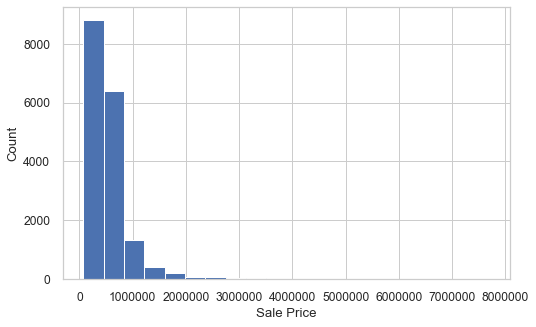

In [10]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    h['price'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

In [11]:
h.keys()

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

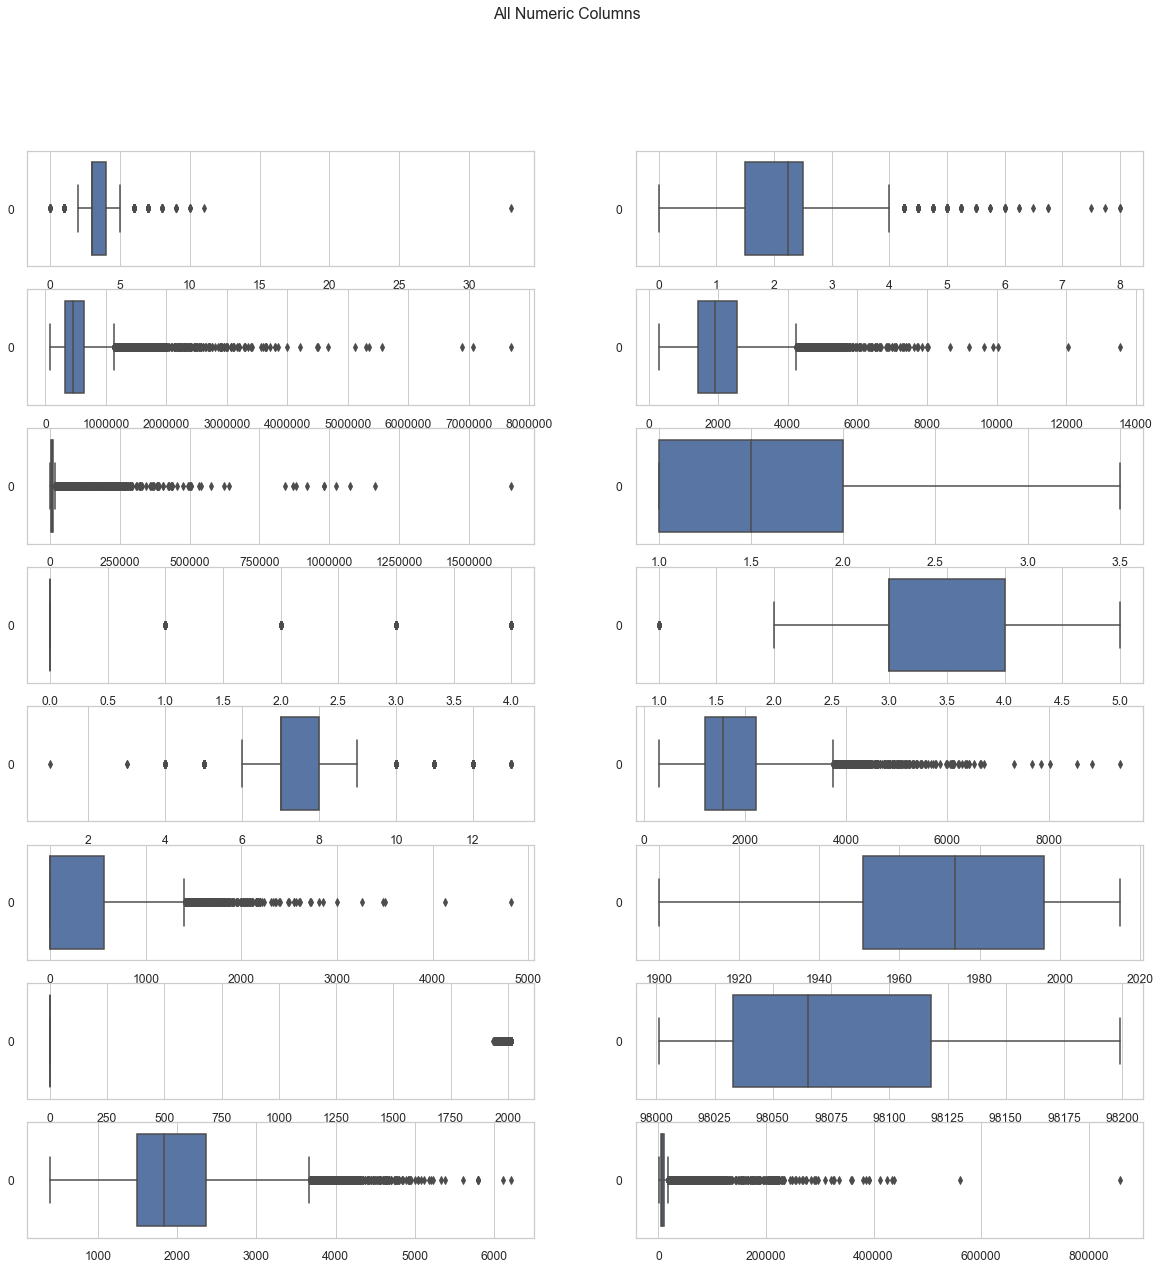

In [12]:
fig, axes = plt.subplots(8,2, figsize=(20,20)) 
fig.suptitle('All Numeric Columns')

sns.boxplot(ax=axes[0, 0], data=h['bedrooms'], orient='h')
sns.boxplot(ax=axes[0, 1], data=h['bathrooms'], orient='h')

sns.boxplot(ax=axes[1, 0], data=h['price'], orient='h') 
sns.boxplot(ax=axes[1, 1], data=h['sqft_living'], orient='h') 

sns.boxplot(ax=axes[2, 0], data=h['sqft_lot'], orient='h')
sns.boxplot(ax=axes[2, 1], data=h['floors'], orient='h')

sns.boxplot(ax=axes[3, 0], data=h['view'], orient='h') 
sns.boxplot(ax=axes[3, 1], data=h['condition'], orient='h')  

sns.boxplot(ax=axes[4, 0], data=h['grade'], orient='h')
sns.boxplot(ax=axes[4, 1], data=h['sqft_above'], orient='h')

sns.boxplot(ax=axes[5, 0], data=h['sqft_basement'], orient='h') 
sns.boxplot(ax=axes[5, 1], data=h['yr_built'], orient='h') 

sns.boxplot(ax=axes[6, 0], data=h['yr_renovated'], orient='h')
sns.boxplot(ax=axes[6, 1], data=h['zipcode'], orient='h')

sns.boxplot(ax=axes[7, 0], data=h['sqft_living15'], orient='h') 
sns.boxplot(ax=axes[7, 1], data=h['sqft_lot15'], orient='h') 

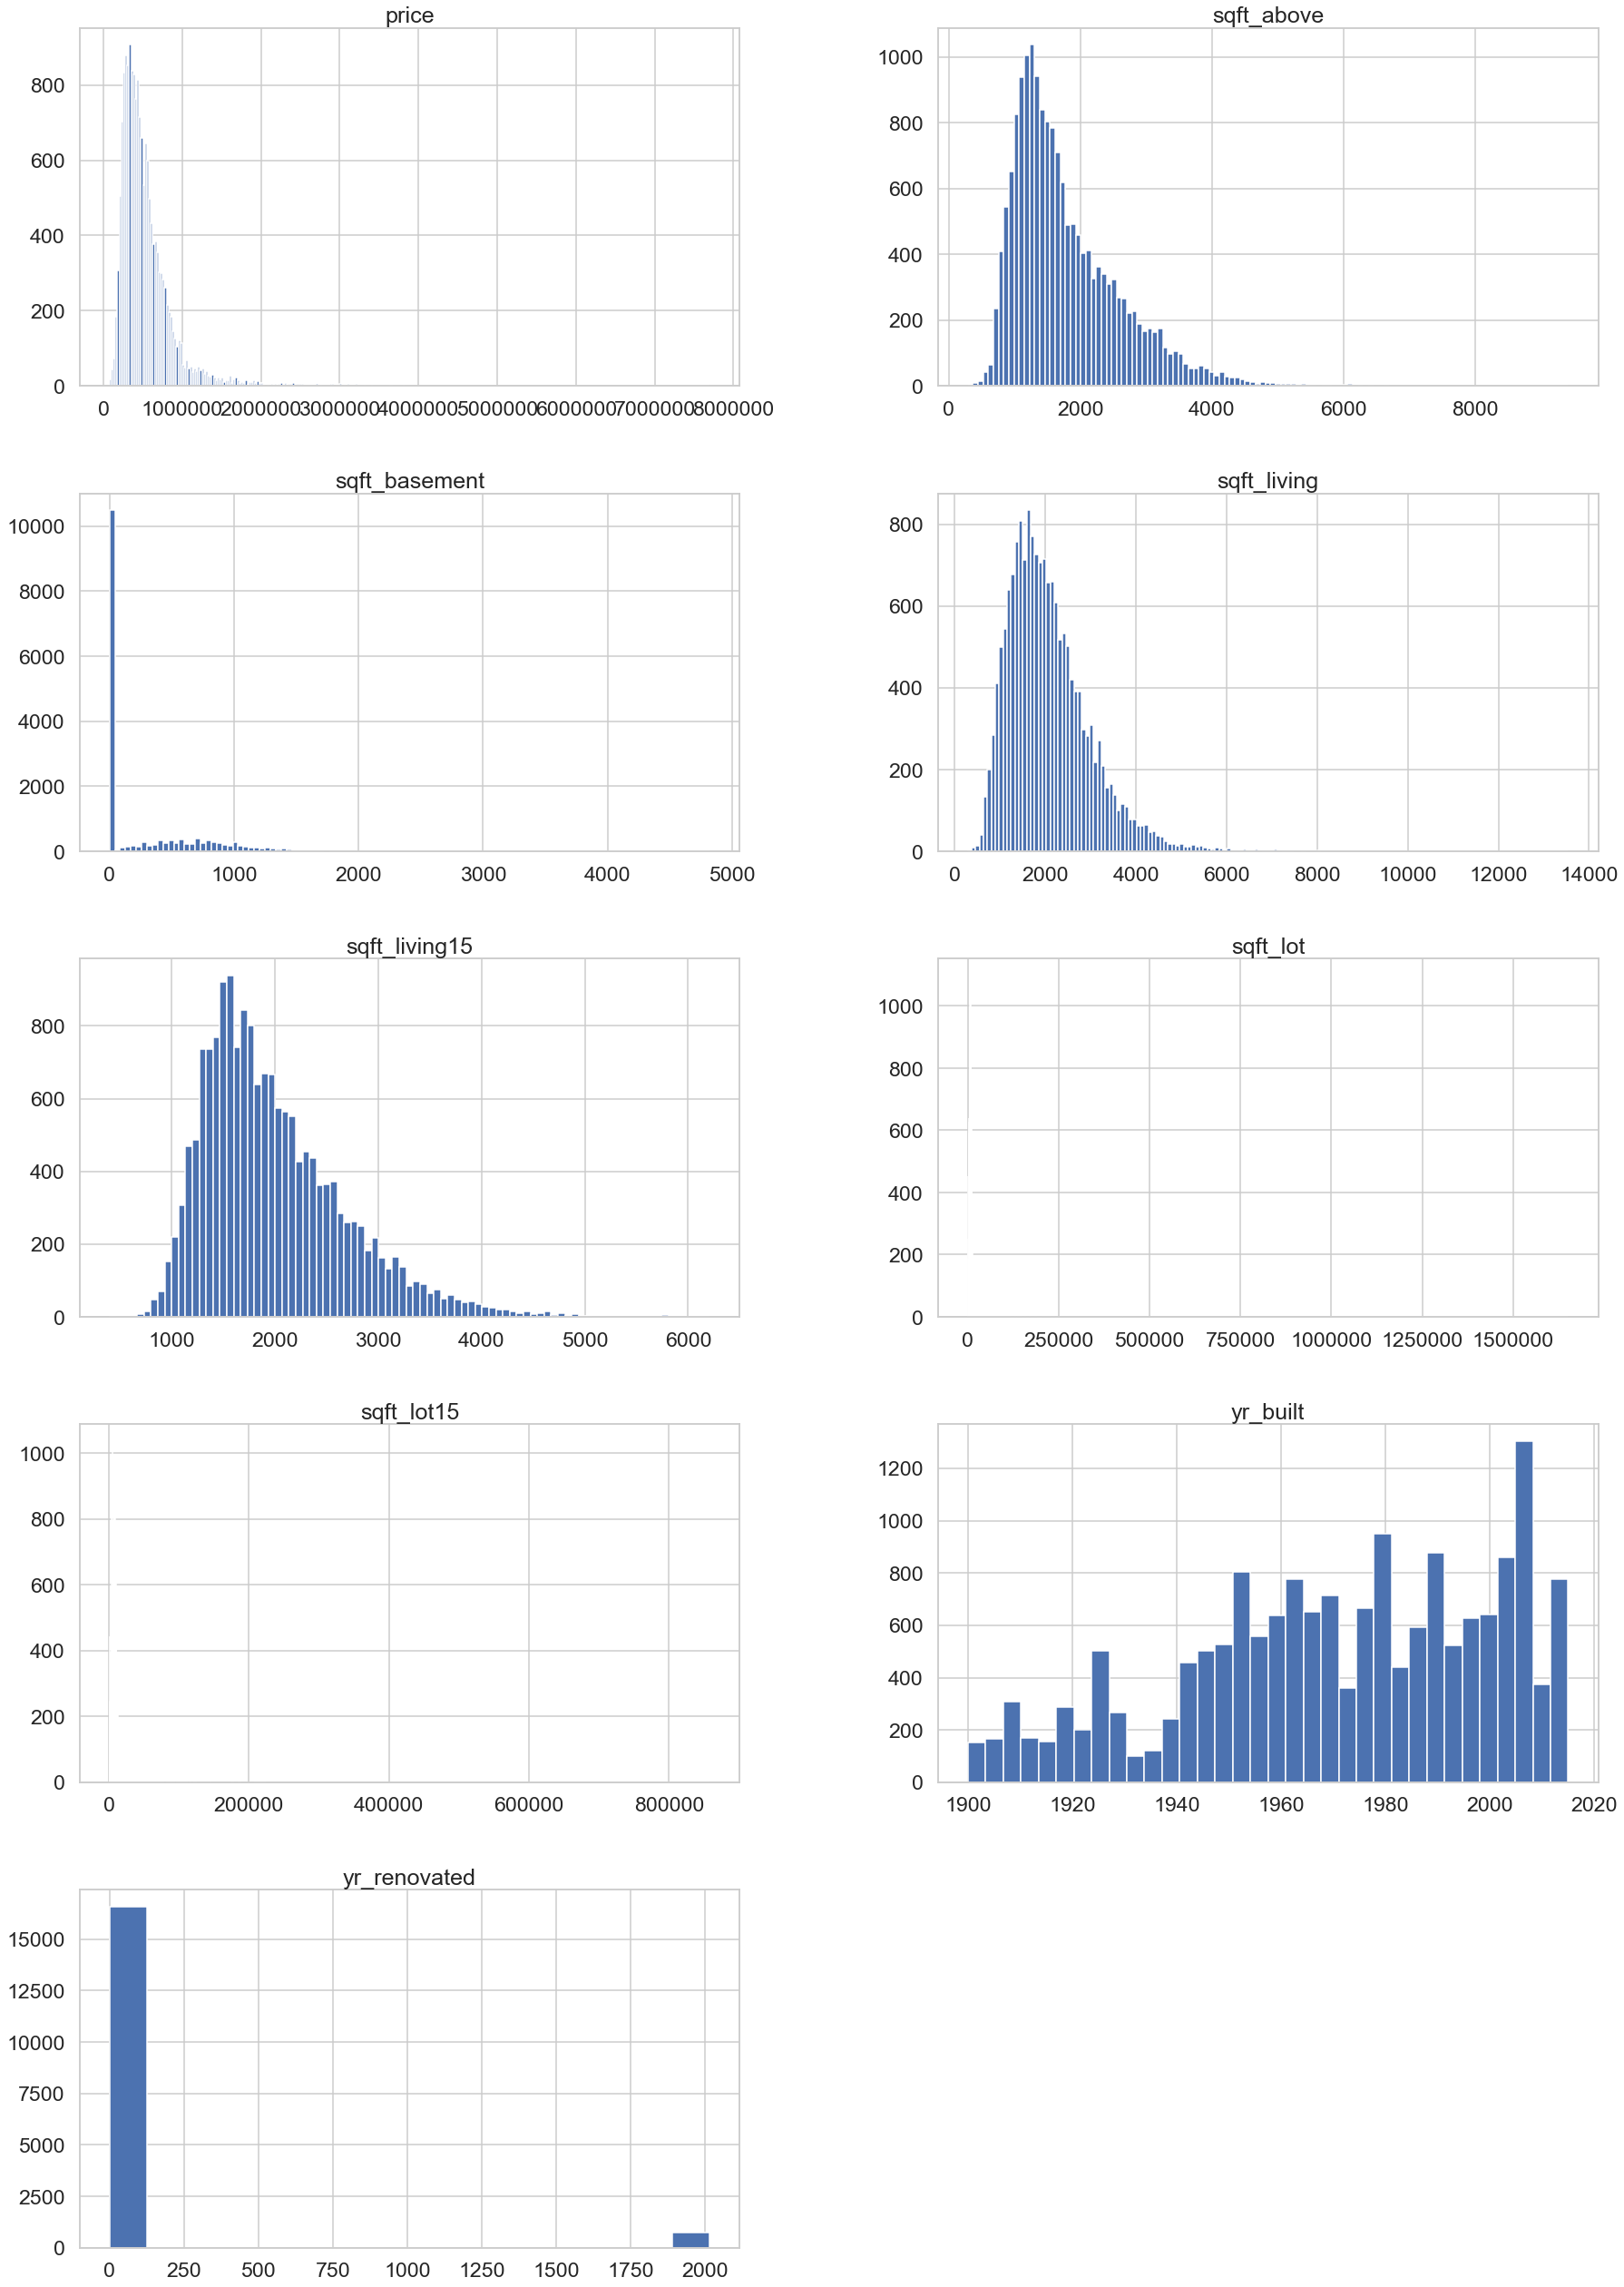

In [13]:
sns.set_context("talk", font_scale=1.4)
h[numerical].hist(bins='auto', figsize=(30, 45), layout=(5, 2));

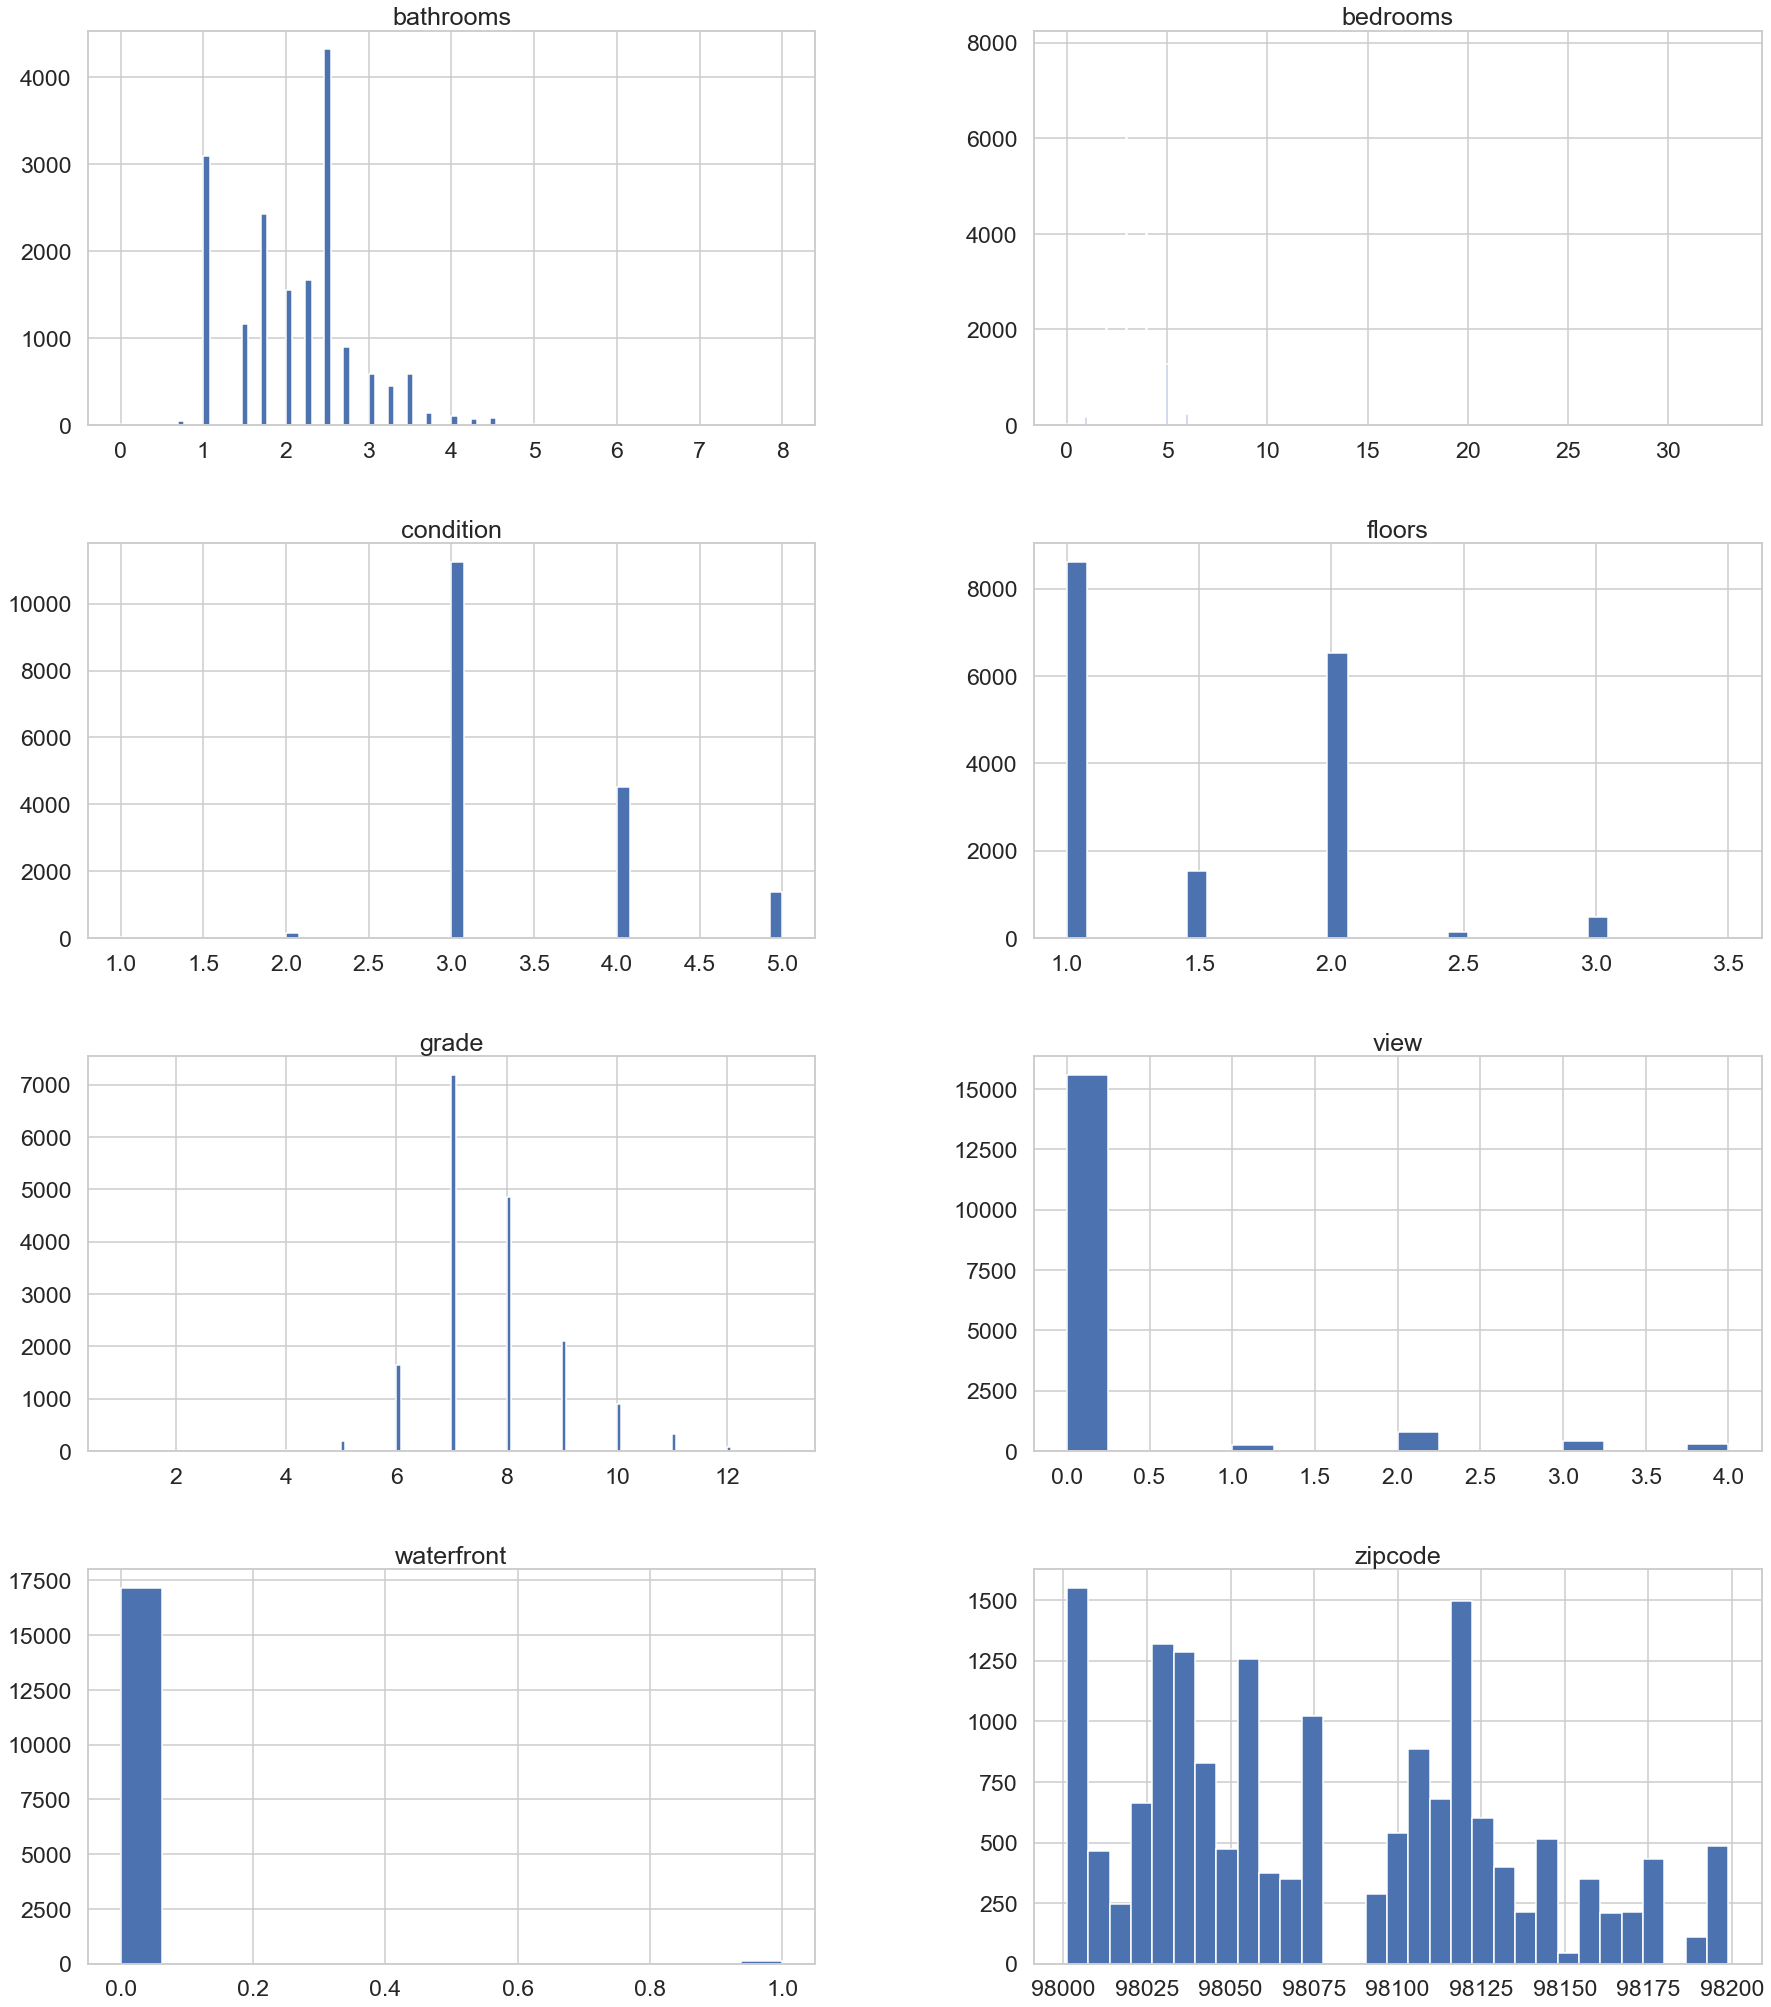

In [14]:
sns.set_context("talk", font_scale=1.4)
h[categorical].hist(bins='auto', figsize=(30, 45), layout=(5, 2));

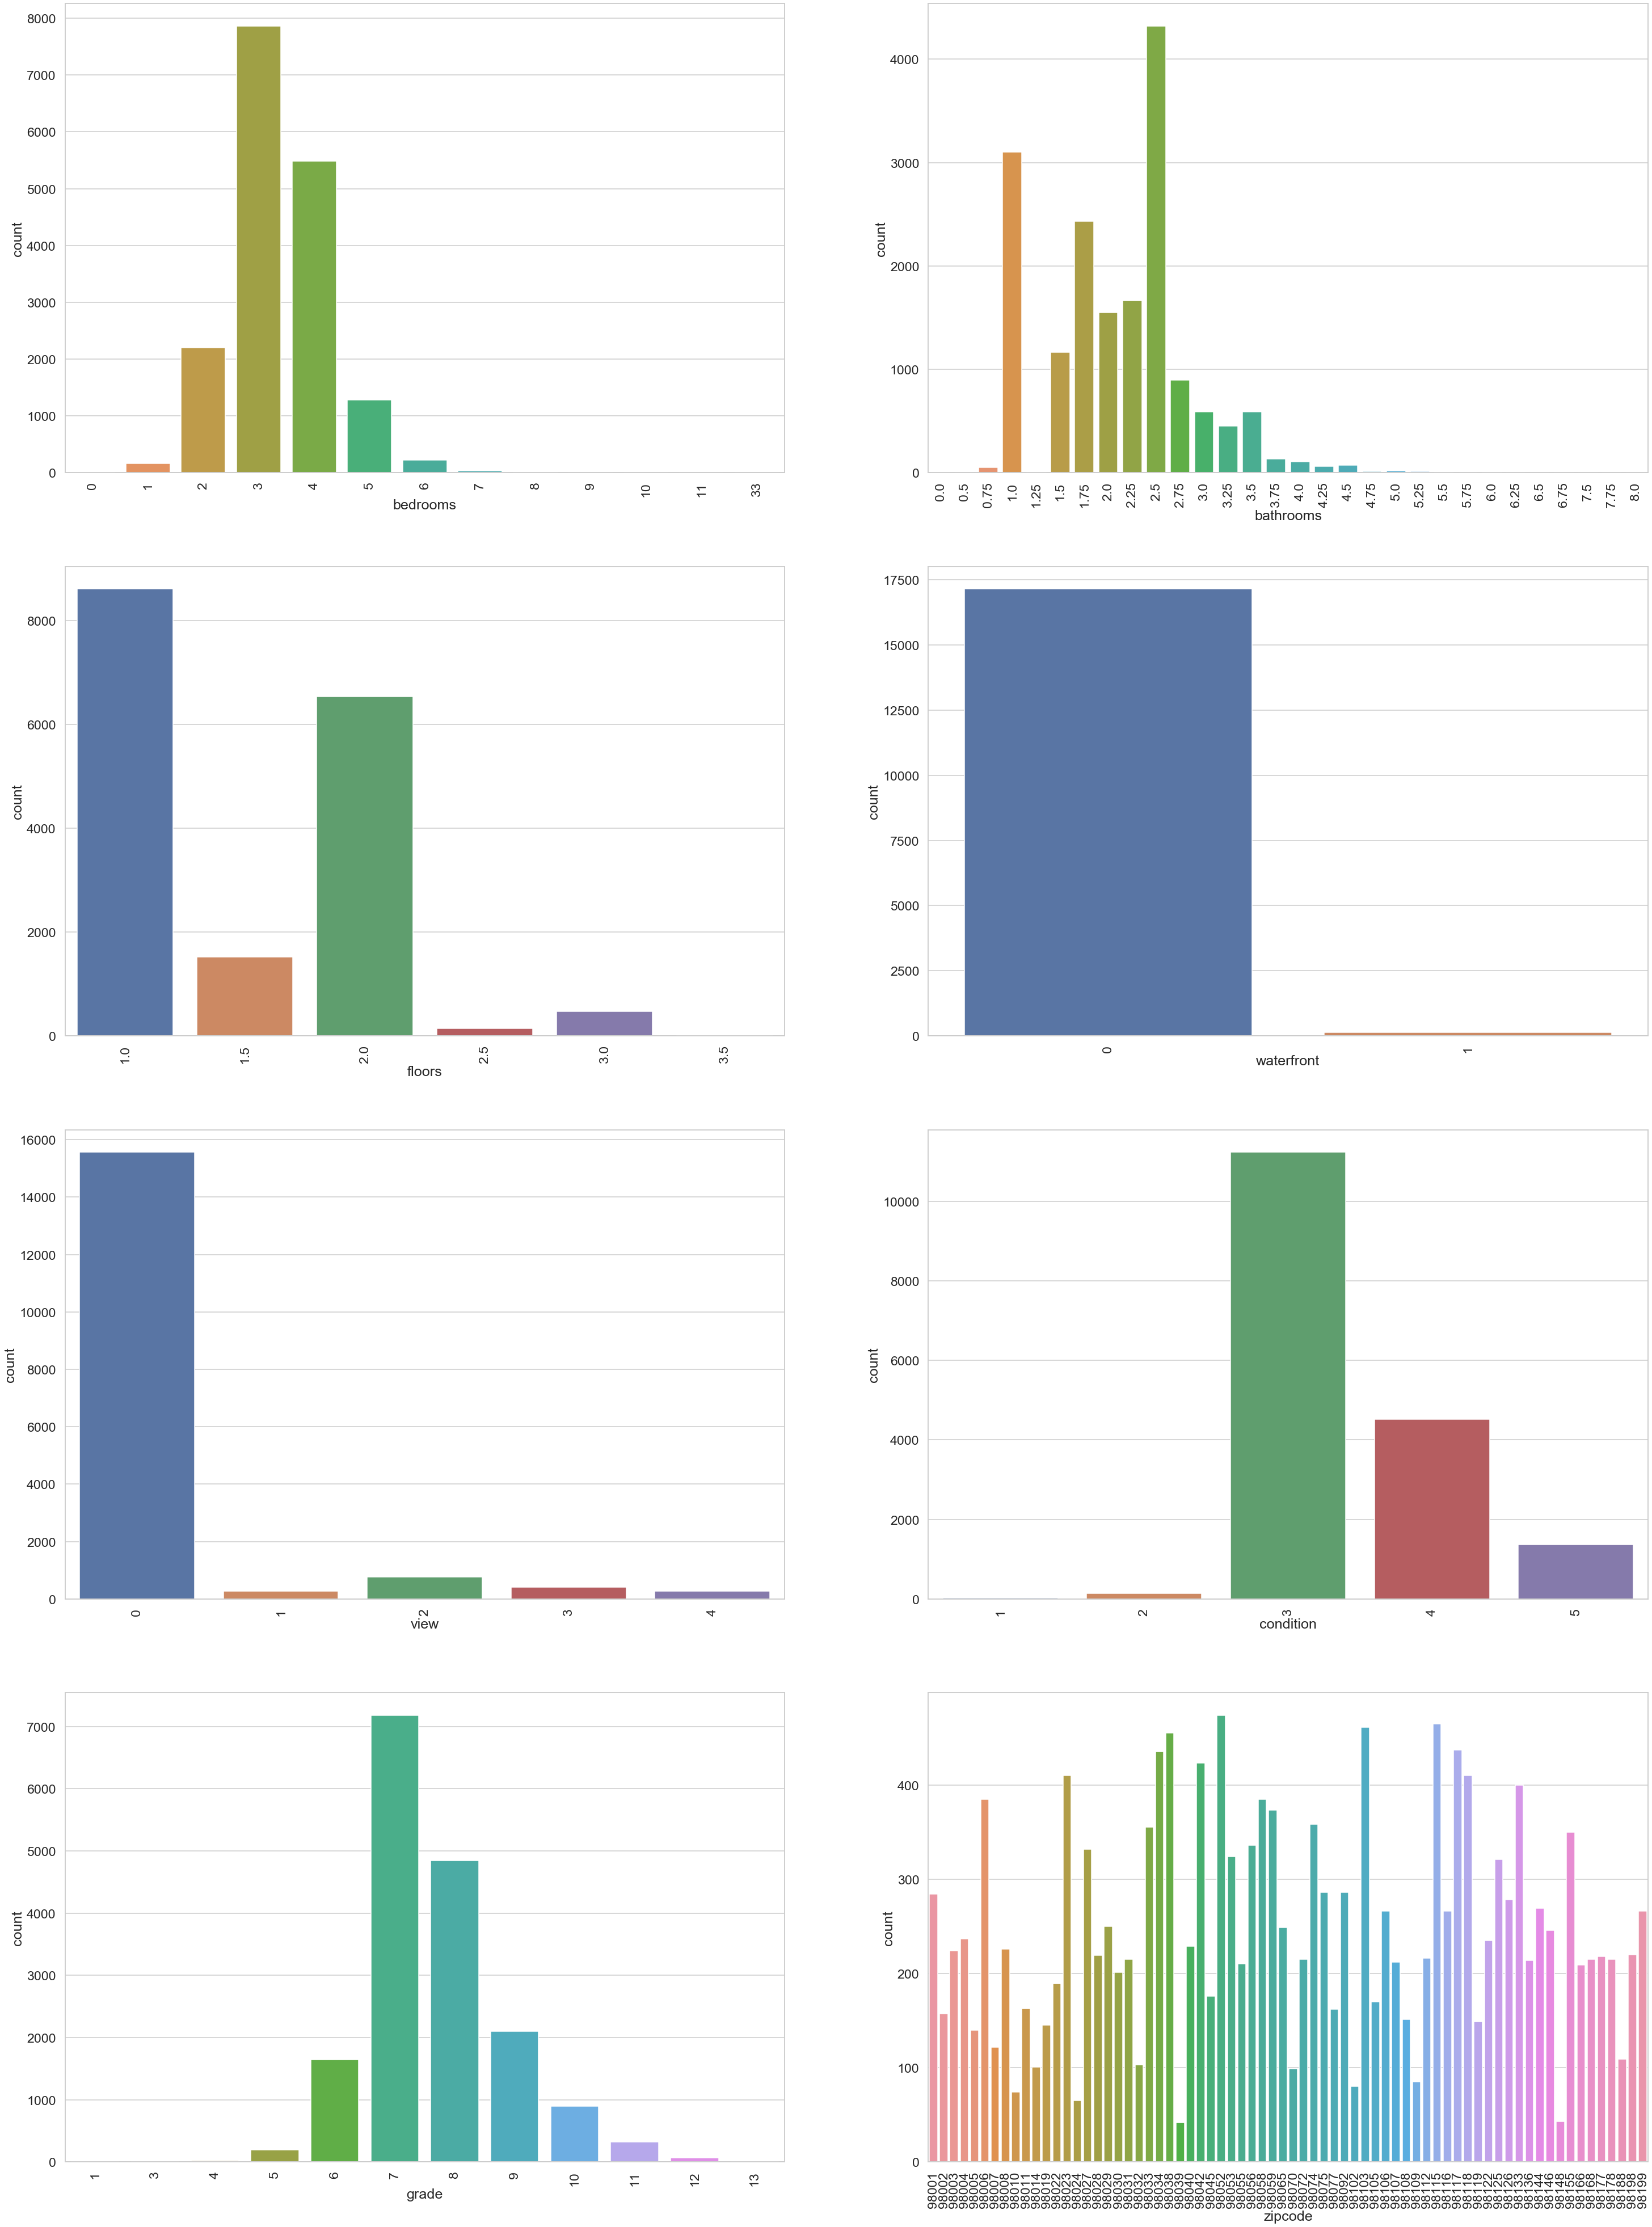

In [15]:
fig, ax = plt.subplots(4, 2, figsize=(50, 70))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(h[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [16]:
# fig, ax = plt.subplots(4, 2, figsize=(50, 70))
# for variable, subplot in zip(numerical, ax.flatten()):
#     sns.countplot(h[variable], ax=subplot)
#     for label in subplot.get_xticklabels():
#         label.set_rotation(90)

In [17]:
test1 = pd.DataFrame(h[h['bedrooms'] > 0].groupby('bathrooms')['bedrooms'].value_counts()) 
test1

bedrooms
bathrooms bedrooms          
0.00      1                2
0.50      1                1
          2                1
          4                1
0.75      1               20
...                      ...
6.75      7                1
7.50      9                1
7.75      6                1
8.00      6                1
          7                1

[135 rows x 1 columns]

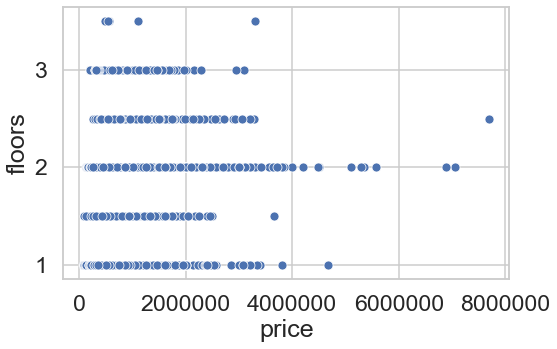

In [18]:
sns.scatterplot(x=h['price'], y=h['floors']);

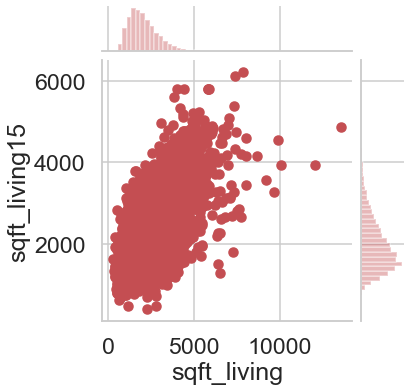

In [19]:
sns.jointplot(x=h['sqft_living'], y=h['sqft_living15'], color='r');

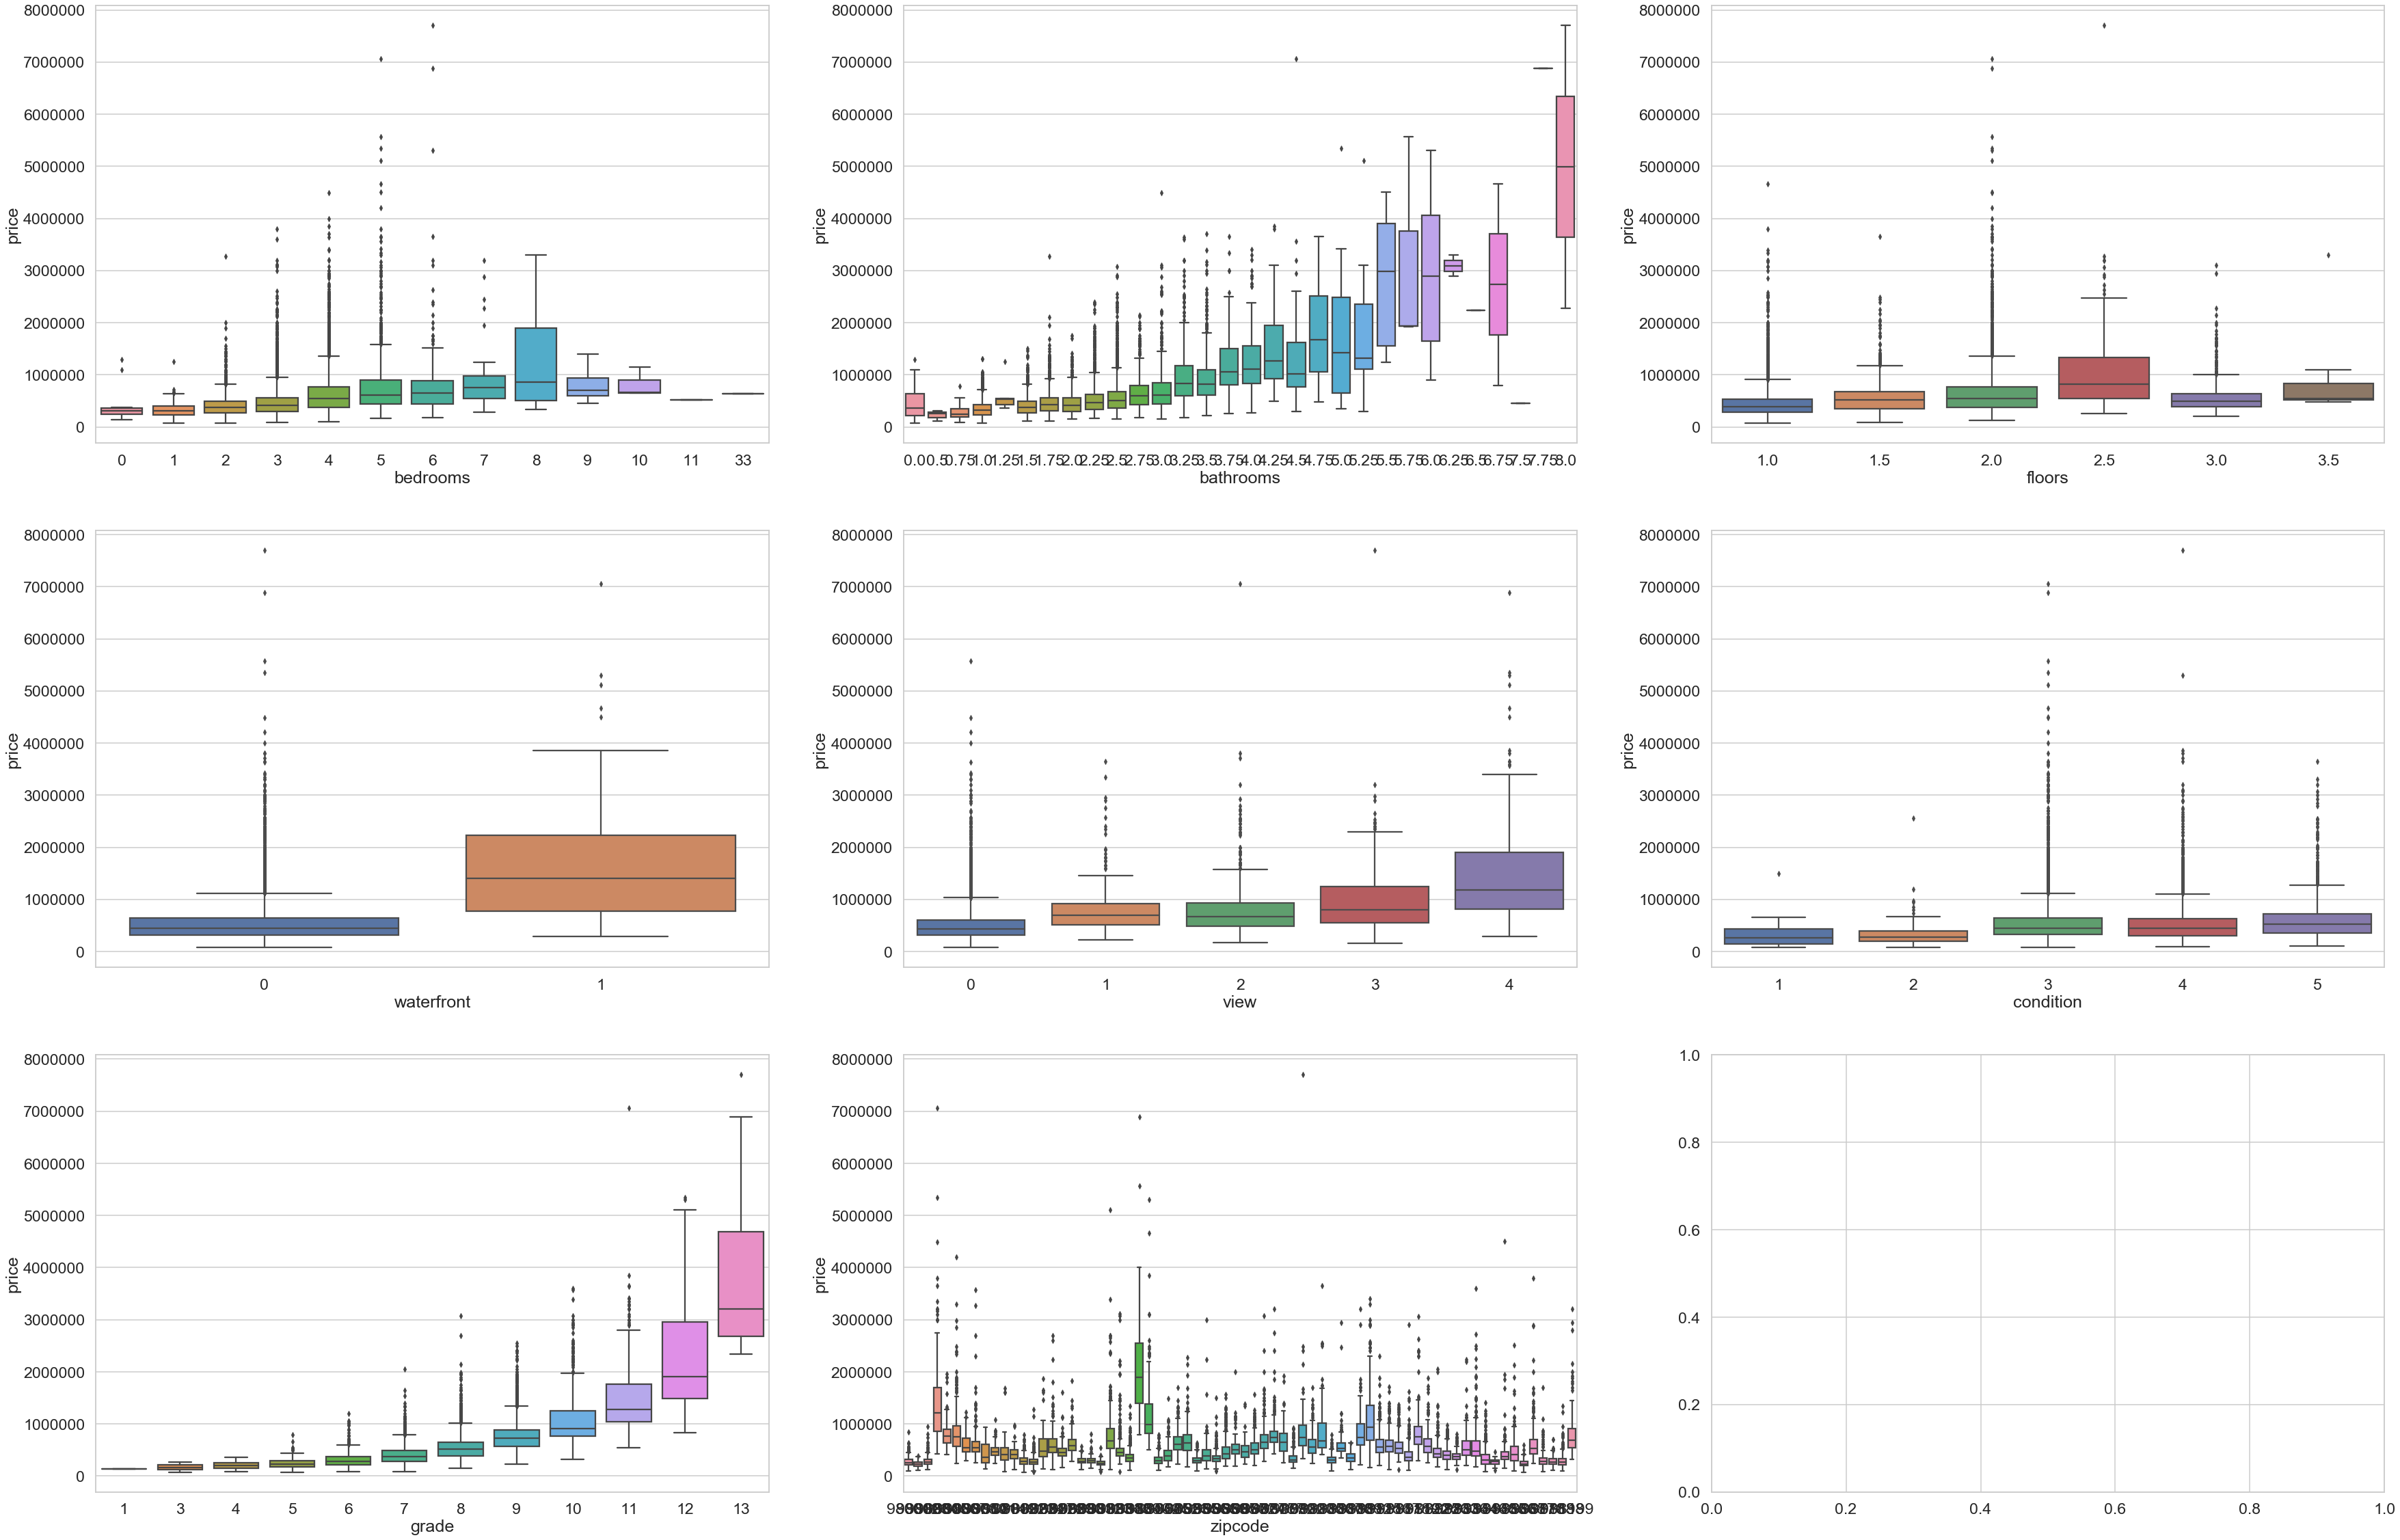

In [20]:

fig, ax = plt.subplots(3, 3, figsize=(60, 40))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='price', data=h, ax=subplot)

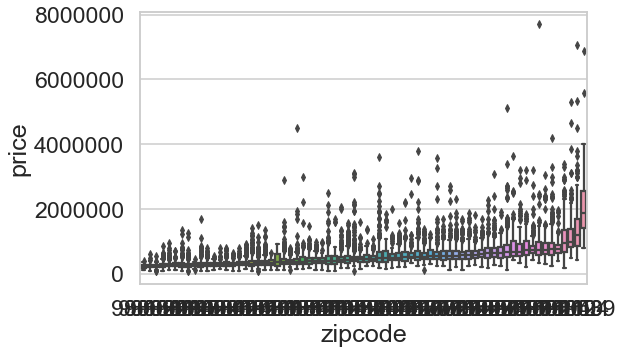

In [21]:

sorted_nb = h.groupby(['zipcode'])['price'].median().sort_values()
sns.boxplot(x=h['zipcode'], y=h['price'], order=list(sorted_nb.index))

In [22]:
#Explored varios columns to find where to cap things
priceu = h.loc[(h['price']>=3200000)] 
len(priceu)

34

In [23]:
pricel = h.loc[(h['price']<=110000)] 
len(pricel)

39

In [24]:
bdh = h.loc[(h['bedrooms']>=7)] 
len(bdh)

50

In [25]:
bdl = h.loc[(h['bedrooms']<=0)] 
len(bdl)

12

In [26]:
bal = h.loc[(h['bathrooms']<=.75)] 
len(bal)

63

In [27]:
bah = h.loc[(h['bathrooms']>=5)] 
len(bah)

53

In [28]:
sqli = h.loc[(h['sqft_living']>=6500)] 
len(sqli)

41

In [29]:
sqlo = h.loc[(h['sqft_lot']>=420000)] 
len(sqlo)

31

In [30]:
fl = h.loc[(h['floors']>=3)] 
len(fl)

482

In [31]:
sqab = h.loc[(h['sqft_above']>=5700)] 
len(sqab)

33

In [32]:
sqba = h.loc[(h['sqft_basement']>=2150)] 
len(sqba)

38

In [33]:
ppfloors = h.groupby(h['sqft_living'], as_index = False)['price'].mean() 
ppfloors

,sqft_living,price
0,290,142000.0
1,370,276000.0
2,384,265000.0
3,390,236500.0
4,410,325000.0
...,...,...
942,9640,4668000.0
943,9890,6885000.0
944,10040,7062500.0
945,12050,7700000.0


In [34]:
# import descartes
# import geopandas as gpd
# import fiona
# from shapely.geometry import Point, Polygon

In [35]:
# zipfile = 'Zip_Codes-shp' 
# streetmap = gpd.read_file(zipfile) 
# crs = {'init': 'epsg:4326'}

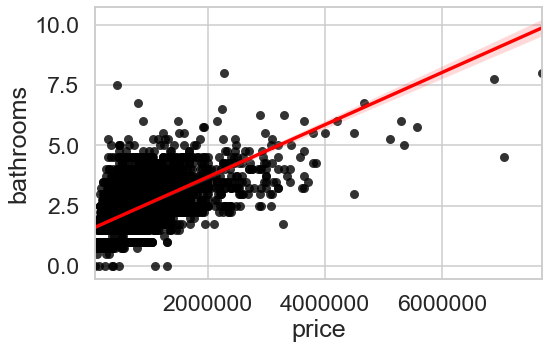

In [36]:
sns.regplot(h['price'],h['bathrooms'], scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [37]:
price_corr = h[h.columns[:]].corr()['price'][:] 
price_corr.sort_values()

zipcode         -0.048958
id              -0.015644
Unnamed: 0      -0.012306
long             0.019327
condition        0.036099
yr_built         0.056450
sqft_lot15       0.081423
sqft_lot         0.086803
yr_renovated     0.117770
floors           0.256985
waterfront       0.275779
lat              0.302394
bedrooms         0.305106
sqft_basement    0.323312
view             0.395485
bathrooms        0.524335
sqft_living15    0.585567
sqft_above       0.607760
grade            0.666215
sqft_living      0.703540
price            1.000000
Name: price, dtype: float64

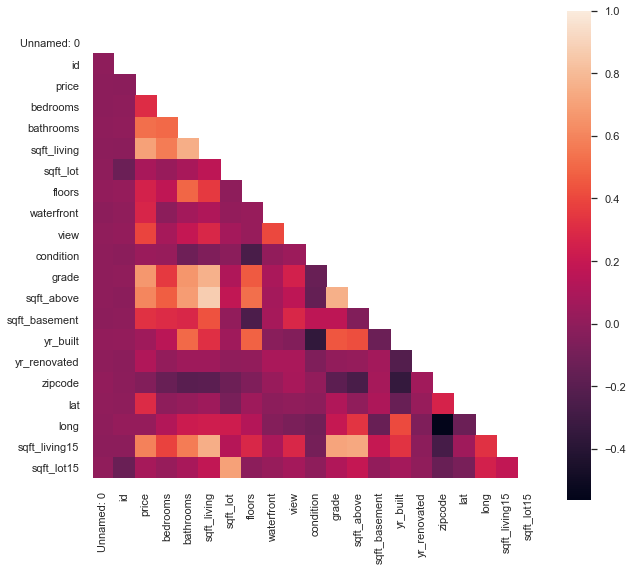

In [38]:
plt.style.use('seaborn')
sns.set(style="white") 


f, ax = plt.subplots(figsize=(10, 9))

mask = np.zeros_like(h.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(h.corr(), mask=mask, square=True)
b, t = plt.ylim() 
b += .5
t -= .5 
plt.ylim(b, t) 
plt.show() 

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [39]:
h.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [40]:
hnj.columns

Index(['zipcode', 'zip_rank', 'niche_grade', 'school_grade', 'population',
       'Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [41]:
features = ['bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','zipcode', 'sqft_living15', 'sqft_lot15'] 

hnj_feat = ['population','bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'] 

sansc_feat = ['population','bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'] 


hf_features = h[features] 
target = h.price 

In [42]:
def model_test(df, features, target): 
    target = df[target]
    df_feature = df[features]
    X_train, X_test, y_train, y_test = train_test_split(df_feature, target, random_state=34,test_size=0.2)
    lm = linear_model.LinearRegression()
    lm = lm.fit(X_train, y_train)
    y_train_pred = lm.predict(X_train) 
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    y_pred = lm.predict(X_test)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))     

In [43]:
model_test(h, features, 'price')

Training:  218527 vs. Testing:  224831


In [44]:
model_test(hnj, hnj_feat, 'price')

Training:  219071 vs. Testing:  221249


In [45]:
hnj_dcol = hnj.copy()

In [46]:
def drop_uneeded_columns(df): 
    unwanted_columns_lists= ['zip_rank','Unnamed: 0', 'id', 'view',
                             'sqft_living15', 'sqft_lot15'] 
    for c in unwanted_columns_lists: 
        del df[c] 

In [47]:
drop_uneeded_columns(hnj_dcol) 

In [48]:
model_test(hnj_dcol, sansc_feat, 'price')

Training:  221581 vs. Testing:  222931


In [49]:
hnj_capped = hnj_dcol.copy()

In [55]:
def cap_ba_bd(row):
    if row['bedrooms'] > 11:
        row['bedrooms'] = 3 #column average
    if row['bedrooms'] > 9:
        row['bedrooms'] = 10
    if row['bathrooms'] < 1:
        row['bathrooms'] = 1
    return row 

In [56]:
hnj_capped= hnj.apply(cap_ba_bd, axis = 1) 

In [57]:
model_test(hnj_capped, sansc_feat, 'price')

Training:  221557 vs. Testing:  221387


In [58]:
# price_mean = hnj_capped['price'].mean()
# three_std = hnj_capped['price'].std()* 3
# mean_plus = price_mean + three_std
# mean_minus = price_mean - three_std

# hnj_cap_price_by_std = hnj_capped[(hnj_capped['price'] < mean_plus) & (hnj_capped['price'] > mean_minus) ] 
# model_test(hnj_cap_price_by_std, sansc_feat, 'price')

In [59]:
sqft_living_mean = hnj_capped['sqft_living'].mean()
sqftli_three_std = hnj_capped['sqft_living'].std()* 3
sqli_mean_plus = sqft_living_mean + sqftli_three_std
sqli_mean_minus = sqft_living_mean - sqftli_three_std

def cap_sft_living(row):
    if row['sqft_living'] > sqli_mean_plus :
        row['sqft_living'] = sqli_mean_plus
    if row['sqft_living'] < sqli_mean_minus:
        row['sqft_living'] = sqli_mean_minus
    return row 

In [60]:
hnj_cap_sqftliving_by_std = hnj_capped.apply(cap_sft_living, axis = 1) 

In [61]:
model_test(hnj_cap_sqftliving_by_std, sansc_feat, 'price')

Training:  214473 vs. Testing:  210166


In [62]:
sqft_lot_mean = hnj_cap_sqftliving_by_std['sqft_lot'].mean()
sqftlo_three_std = hnj_cap_sqftliving_by_std['sqft_lot'].std()* 3
sqlo_mean_plus = sqft_lot_mean + sqftlo_three_std
sqlo_mean_minus = sqft_lot_mean - sqftlo_three_std

def cap_sft_lot(row):
    if row['sqft_lot'] > sqlo_mean_plus :
        row['sqft_lot'] = sqlo_mean_plus
    if row['sqft_lot'] < sqlo_mean_minus:
        row['sqft_lot'] = sqlo_mean_minus
    return row 

In [63]:
hnj_cap_sqftlot_by_std = hnj_cap_sqftliving_by_std.apply(cap_sft_lot, axis = 1) 

In [64]:
model_test(hnj_cap_sqftlot_by_std, sansc_feat, 'price')

Training:  213948 vs. Testing:  209761


In [65]:
hnj_cap_sqftlot_by_std

,zipcode,zip_rank,niche_grade,school_grade,population,Unnamed: 0,id,date,price,bedrooms,...,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,98001,59,B,B-,32625,42,9264450460,20140603T000000,309000.0,5,...,3,8,2481,0,2014,0,47.2602,-122.284,2363,4175
1,98001,59,B,B-,32625,96,6181400920,20150430T000000,286651.0,3,...,3,7,1830,0,2004,0,47.3035,-122.283,2488,4998
2,98001,59,B,B-,32625,211,1311910300,20150204T000000,260000.0,5,...,4,7,1270,1050,1967,0,47.3351,-122.282,1760,7600
3,98001,59,B,B-,32625,534,3751604895,20140605T000000,165000.0,3,...,4,5,1150,0,1908,0,47.2756,-122.270,1290,19200
4,98001,59,B,B-,32625,564,8856001090,20150130T000000,185900.0,3,...,4,5,940,0,1909,0,47.2763,-122.257,1370,10255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,98199,26,A,A-,21954,16970,6821102100,20150317T000000,510000.0,2,...,5,6,810,0,1942,0,47.6493,-122.398,1920,6000
17286,98199,26,A,A-,21954,17015,1373800330,20150420T000000,1115000.0,4,...,4,10,2190,1500,1951,0,47.6434,-122.412,3460,8160
17287,98199,26,A,A-,21954,17095,1877500090,20150211T000000,756000.0,3,...,4,8,1650,1910,1948,0,47.6473,-122.407,2760,8297
17288,98199,26,A,A-,21954,17102,1370802540,20150108T000000,875000.0,2,...,4,8,1700,1020,1936,0,47.6384,-122.404,2520,5303


In [66]:
clean_data = hnj_cap_sqftlot_by_std.copy()

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [67]:
clean_data['distance_downtown'] = np.nan

In [68]:
def dist_to_downtown(row): 
    downtown = (47.6050, -122.3344) 
    coord = (row['lat'], row['long']) 
    dist = distance(downtown, coord).miles 
    row['distance_downtown'] = (round((dist), 2))
    return row

In [69]:
clean_data1 = clean_data.apply(dist_to_downtown, axis = 1)

In [70]:
column_test = ['distance_downtown','population','bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'] 

model_test(clean_data1, column_test, 'price')

Training:  197178 vs. Testing:  191694


In [71]:
clean_data1['distance_amazon'] = np.nan

In [72]:
def dist_to_amazon(row): 
    amazon = (47.615868, -122.339850) 
    coord = (row['lat'], row['long']) 
    dist = distance(amazon, coord).miles 
    row['distance_amazon'] = (round((dist), 2))
    return row

In [73]:
clean_data2 = clean_data1.apply(dist_to_amazon, axis = 1)

In [74]:
column_test = ['distance_amazon','distance_downtown','population','bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'] 

model_test(clean_data2, column_test, 'price')

Training:  192833 vs. Testing:  187361


In [75]:
clean_data2['distance_to_gas_works'] = np.nan

In [76]:
def dist_to_gas_work(row): 
    gas_works_park = (47.6456, -122.3344) 
    coord = (row['lat'], row['long']) 
    dist = distance(gas_works_park, coord).miles 
    row['distance_to_gas_works'] = (round((dist), 2))
    return row

In [77]:
clean_data3 = clean_data2.apply(dist_to_gas_work, axis = 1)

In [78]:
column_test = ['distance_to_gas_works','distance_amazon','distance_downtown','population','bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'] 

model_test(clean_data3, column_test, 'price')

Training:  192548 vs. Testing:  186972


In [79]:
clean_data3['bath_to_bed'] = np.nan

In [80]:
def b_b_column(row): 
    if row['bedrooms'] == 0: 
         bath_bed = row['bathrooms']/1
    else:
        bath_bed = row['bathrooms']/row['bedrooms'] 
    ratio_ab = abs(bath_bed) 
    row['bath_to_bed'] = ratio_ab 
    return row 


In [81]:
clean_data4 = clean_data3.apply(b_b_column, axis = 1)

In [82]:
column_test = ['bath_to_bed','distance_to_gas_works','distance_amazon','distance_downtown','population','bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'] 

model_test(clean_data4, column_test, 'price')

Training:  192242 vs. Testing:  186886


In [83]:
clean_data4['golden_ratio'] = np.nan

In [84]:
def golden_ratio(row): 
    golden_ratio = 2/3
    golden_ratio_u = golden_ratio + (golden_ratio*.10) 
    golden_ratio_l = golden_ratio - (golden_ratio*.10) 
    if row['bath_to_bed'] >= golden_ratio_l:
        if row['bath_to_bed'] <= golden_ratio_u: 
            row['golden_ratio'] = 1  
        else: 
            row['golden_ratio'] = 0 
    else: 
        row['golden_ratio'] = 0 
    return row

In [85]:
clean_data5 = clean_data4.apply(golden_ratio, axis = 1)

In [86]:
column_test = ['golden_ratio','bath_to_bed','distance_to_gas_works','distance_amazon','distance_downtown','population','bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'] 

model_test(clean_data5, column_test, 'price')

Training:  192073 vs. Testing:  186723


In [87]:
clean_data5['sqft_li_to_sqft_lo'] = np.nan

In [88]:
def li_lo_column(row): 
    living__to_lot = row['sqft_living']/row['sqft_lot']
    ratio_ab = abs(living__to_lot) 
    row['sqft_li_to_sqft_lo'] = ratio_ab 
    return row 

In [89]:
clean_data6 = clean_data5.apply(li_lo_column, axis = 1)

In [90]:
column_test = ['sqft_li_to_sqft_lo','golden_ratio','bath_to_bed','distance_to_gas_works','distance_amazon','distance_downtown','population','bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'] 

model_test(clean_data6, column_test, 'price')

Training:  192044 vs. Testing:  186629


In [91]:
clean_data6['score'] = np.nan

In [92]:
def grade_n_cond(row): 
    new_grade = row['grade']*1.25
    score = new_grade + row['condition']
    row['score'] = score 
    return row

In [93]:
clean_data7 = clean_data6.apply(grade_n_cond, axis = 1)

In [94]:
column_test = ['score','sqft_li_to_sqft_lo','golden_ratio','bath_to_bed','distance_to_gas_works',
               'distance_amazon','distance_downtown','population','bedrooms', 'bathrooms','sqft_living', 
               'sqft_lot', 'floors', 'waterfront', 'condition','grade', 'sqft_above', 'sqft_basement', 
               'yr_built', 'yr_renovated'] 

model_test(clean_data7, column_test, 'price')

Training:  192044 vs. Testing:  186629


In [95]:
clean_data7['p_p_sqft'] = np.nan

In [96]:
def price_per_sqft(row): 
    pps = row['price']/row['sqft_living']
    row['p_p_sqft'] = round(pps,2) 
    return row

In [97]:
clean_data8 = clean_data7.apply(price_per_sqft, axis = 1)

In [371]:
column_test = ['score','sqft_li_to_sqft_lo','golden_ratio','bath_to_bed','distance_to_gas_works',
               'distance_amazon','distance_downtown','population','bedrooms', 'bathrooms','sqft_living', 
               'sqft_lot', 'floors', 'waterfront', 'condition','grade', 'sqft_above', 'sqft_basement', 
               'yr_built', 'yr_renovated'] 

model_test(clean_data8, column_test, 'price')

Training:  192044 vs. Testing:  186629


In [101]:
clean_data8['year_updated'] = np.nan

In [102]:
def year_changed(row): 
    if row['yr_renovated'] > 1:
        row['year_updated'] = row['yr_renovated']  
    else: 
        row['year_updated'] = row['yr_built']
    return row

In [103]:
clean_data9 = clean_data8.apply(year_changed, axis = 1)

In [372]:
column_test = ['year_updated','score','sqft_li_to_sqft_lo','golden_ratio','bath_to_bed',
               'distance_to_gas_works','distance_amazon','population','bedrooms', 'bathrooms','sqft_living',
               'sqft_lot', 'floors', 'waterfront', 'sqft_above','sqft_basement'] 

model_test(clean_data9, column_test, 'price')

Training:  194767 vs. Testing:  189345


In [112]:
clean_data9['basement'] = clean_data9['sqft_basement'].map(lambda x : 1 if x != 0 else 0)

In [373]:
column_test = ['year_updated','score','sqft_li_to_sqft_lo','golden_ratio','bath_to_bed',
               'distance_to_gas_works','distance_amazon','population','bedrooms', 'bathrooms','sqft_living',
               'sqft_lot', 'floors', 'waterfront', 'basement'] 

model_test(clean_data9, column_test, 'price')

Training:  211338 vs. Testing:  210802


In [114]:
clean_data10 = clean_data9.copy()

In [115]:
clean_data10['niche_grade'] = clean_data10['niche_grade'].replace(['A+','A+ ','A','A-','B+','B','B-'],[6,6,5,4,3,2,1])

In [116]:
column_test = ['year_updated','p_p_sqft','score','sqft_li_to_sqft_lo','golden_ratio','bath_to_bed',
               'distance_to_gas_works','distance_amazon','population','bedrooms', 'bathrooms','sqft_living',
               'sqft_lot', 'floors', 'waterfront', 'basement','niche_grade'] 

model_test(clean_data10, column_test, 'price')

Training:  123230 vs. Testing:  125001


In [117]:
clean_data11 = clean_data10.copy()

In [118]:
clean_data11['school_grade'] = clean_data10['school_grade'].replace(['A+','A+ ','A ','A','A-','A- ','B+','B','B-','C+'],[7,7,6,6,5,5,4,3,2,1])

In [119]:
column_test = ['year_updated','p_p_sqft','score','sqft_li_to_sqft_lo','golden_ratio','bath_to_bed',
               'distance_to_gas_works','distance_amazon','population','bedrooms', 'bathrooms','sqft_living',
               'sqft_lot', 'floors', 'waterfront', 'basement','niche_grade', 'school_grade'] 

model_test(clean_data11, column_test, 'price')

Training:  123162 vs. Testing:  124892


In [178]:
clean_data12 = clean_data11.copy()

In [179]:
clean_data12['home_category'] = np.nan

In [180]:
def home_cat(row): 
    if row['bedrooms'] < 2:
        row['home_category'] = 'starter'  
    elif row['bedrooms'] < 5: 
        row['home_category'] = 'small_family' 
    elif row['bedrooms'] < 9: 
        row['home_category'] = 'large_family'
    else:
        row['bedrooms'] >= 9
        row['home_category'] = 'mansion'
    return row

In [181]:
clean_data13 = clean_data12.apply(home_cat, axis = 1)

In [761]:
clean_data14 = clean_data13.copy()

In [762]:
clean_data14['score_cat'] = np.nan

In [763]:
def score_cat(row): 
    if row['score'] <= 11.5:
        row['score_cat'] = 'low'  
    elif row['score'] <= 12: 
        row['score_cat'] = 'low_mid' 
    elif row['score'] <= 13: 
        row['score_cat'] = 'high_mid'
    else:
        row['score_cat'] = 'high_end'
    return row

In [1200]:
clean_data15 = clean_data14.apply(score_cat, axis = 1)

In [1201]:
clean_data15['score_cat'].value_counts()

high_mid    5889
high_end    5473
low_mid     4192
low         1736
Name: score_cat, dtype: int64

In [1202]:
clean_data15['yr_built'].describe()

count    17290.000000
mean      1970.792019
std         29.343516
min       1900.000000
25%       1951.000000
50%       1974.000000
75%       1996.000000
max       2015.000000
Name: yr_built, dtype: float64

In [1203]:
column_test = ['year_updated','p_p_sqft','score','sqft_li_to_sqft_lo','golden_ratio',
               'bath_to_bed','distance_to_gas_works','distance_amazon','population',
               'bedrooms', 'bathrooms','sqft_living','sqft_lot', 'floors', 'waterfront', 
               'basement','niche_grade', 'school_grade'] 

model_test(clean_data11, column_test, 'price')

Training:  123162 vs. Testing:  124892


In [1204]:
clean_data15.keys()

Index(['zipcode', 'zip_rank', 'niche_grade', 'school_grade', 'population',
       'Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'distance_downtown',
       'distance_amazon', 'distance_to_gas_works', 'bath_to_bed',
       'golden_ratio', 'sqft_li_to_sqft_lo', 'score', 'p_p_sqft',
       'year_updated', 'basement', 'home_category', 'score_cat'],
      dtype='object')

In [1205]:
clean_data15.describe()

,zipcode,zip_rank,niche_grade,school_grade,population,Unnamed: 0,id,price,bedrooms,bathrooms,...,distance_downtown,distance_amazon,distance_to_gas_works,bath_to_bed,golden_ratio,sqft_li_to_sqft_lo,score,p_p_sqft,year_updated,basement
count,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,...,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,98078.193175,33.879179,4.635281,5.127473,34178.938230,8644.500000,4.565502e+09,5.407395e+05,3.370677,2.113245,...,11.508367,11.704175,12.020590,0.641375,0.215905,0.319935,12.976533,264.785727,1973.158010,0.393638
std,53.607949,19.533353,1.378090,1.699861,12365.309821,4991.337413,2.874656e+09,3.733190e+05,0.911471,0.768143,...,6.598837,6.865742,7.531279,0.214277,0.411461,0.261845,1.519423,112.610710,28.805976,0.488570
min,98001.000000,1.000000,1.000000,1.000000,3260.000000,0.000000,1.000102e+06,7.500000e+04,0.000000,1.000000,...,0.720000,0.790000,0.200000,0.142857,0.000000,0.002701,2.250000,87.590000,1900.000000,0.000000
25%,98033.000000,17.000000,3.000000,4.000000,25426.000000,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,...,6.130000,6.060000,6.250000,0.500000,0.000000,0.156314,11.750000,182.635000,1954.000000,0.000000
50%,98065.000000,33.000000,5.000000,5.000000,35028.000000,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,...,10.355000,10.430000,10.410000,0.625000,0.000000,0.246165,13.000000,244.485000,1977.000000,0.000000
75%,98118.000000,50.000000,6.000000,7.000000,43119.000000,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,...,15.730000,16.100000,16.900000,0.750000,0.000000,0.401280,14.000000,318.317500,1999.000000,1.000000
max,98199.000000,70.000000,6.000000,7.000000,67779.000000,17289.000000,9.900000e+09,7.700000e+06,10.000000,8.000000,...,48.160000,48.300000,47.790000,2.500000,1.000000,2.187500,20.250000,1590.410000,2015.000000,1.000000


In [1206]:
def drop_uneeded_columns2(df): 
    unwanted_columns_lists= ['zip_rank','Unnamed: 0', 'date', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
        'sqft_living15', 'sqft_lot15', 'distance_downtown','p_p_sqft'] 
    for c in unwanted_columns_lists: 
        del df[c] 

In [1207]:
drop_uneeded_columns2(clean_data15)

In [1208]:
clean_data15.head()

,zipcode,niche_grade,school_grade,population,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,distance_amazon,distance_to_gas_works,bath_to_bed,golden_ratio,sqft_li_to_sqft_lo,score,year_updated,basement,home_category,score_cat
0,98001,2,2,32625,9264450460,309000.0,5,2.75,2481.0,4045.0,...,24.71,26.73,0.550000,0,0.613350,13.00,2014,0,large_family,high_mid
1,98001,2,2,32625,6181400920,286651.0,3,2.50,1830.0,4997.0,...,21.74,23.76,0.833333,0,0.366220,11.75,2004,0,small_family,low_mid
2,98001,2,2,32625,1311910300,260000.0,5,2.25,2320.0,6375.0,...,19.58,21.59,0.450000,0,0.363922,12.75,1967,1,large_family,high_mid
3,98001,2,2,32625,3751604895,165000.0,3,1.00,1150.0,19200.0,...,23.73,25.74,0.333333,0,0.059896,10.25,1908,0,small_family,low
4,98001,2,2,32625,8856001090,185900.0,3,1.00,940.0,10890.0,...,23.78,25.77,0.333333,0,0.086318,10.25,1909,0,small_family,low


In [1209]:
clean_data16 = clean_data15.copy()

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [1210]:
data_dummy = pd.get_dummies(clean_data16['home_category']).tail(4)

In [1211]:
clean_data17 = pd.concat([clean_data16, pd.get_dummies(clean_data16['home_category'])], 1)

In [1212]:
clean_data17.keys()

Index(['zipcode', 'niche_grade', 'school_grade', 'population', 'id', 'price',
       'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'lat', 'long', 'distance_amazon',
       'distance_to_gas_works', 'bath_to_bed', 'golden_ratio',
       'sqft_li_to_sqft_lo', 'score', 'year_updated', 'basement',
       'home_category', 'score_cat', 'large_family', 'mansion', 'small_family',
       'starter'],
      dtype='object')

In [1213]:
clean_data17.head()

,zipcode,niche_grade,school_grade,population,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,sqft_li_to_sqft_lo,score,year_updated,basement,home_category,score_cat,large_family,mansion,small_family,starter
0,98001,2,2,32625,9264450460,309000.0,5,2.75,2481.0,4045.0,...,0.613350,13.00,2014,0,large_family,high_mid,1,0,0,0
1,98001,2,2,32625,6181400920,286651.0,3,2.50,1830.0,4997.0,...,0.366220,11.75,2004,0,small_family,low_mid,0,0,1,0
2,98001,2,2,32625,1311910300,260000.0,5,2.25,2320.0,6375.0,...,0.363922,12.75,1967,1,large_family,high_mid,1,0,0,0
3,98001,2,2,32625,3751604895,165000.0,3,1.00,1150.0,19200.0,...,0.059896,10.25,1908,0,small_family,low,0,0,1,0
4,98001,2,2,32625,8856001090,185900.0,3,1.00,940.0,10890.0,...,0.086318,10.25,1909,0,small_family,low,0,0,1,0


In [1214]:
column_test = ['niche_grade', 'school_grade', 'population','bedrooms', 
               'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
               'waterfront', 'distance_amazon', 'distance_to_gas_works',
               'bath_to_bed', 'golden_ratio', 'sqft_li_to_sqft_lo', 
               'score', 'year_updated', 'basement', 'view',
               'large_family', 'mansion', 'small_family','starter'] 

model_test(clean_data17, column_test, 'price')

Training:  202484 vs. Testing:  203429


In [1215]:
clean_data18 = clean_data17.copy()

In [1216]:
data_dummy = pd.get_dummies(clean_data18['score_cat']).tail(4)
clean_data19 = pd.concat([clean_data18, pd.get_dummies(clean_data18['score_cat'])], 1)  

In [1217]:
clean_data19.head()

,zipcode,niche_grade,school_grade,population,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,home_category,score_cat,large_family,mansion,small_family,starter,high_end,high_mid,low,low_mid
0,98001,2,2,32625,9264450460,309000.0,5,2.75,2481.0,4045.0,...,large_family,high_mid,1,0,0,0,0,1,0,0
1,98001,2,2,32625,6181400920,286651.0,3,2.50,1830.0,4997.0,...,small_family,low_mid,0,0,1,0,0,0,0,1
2,98001,2,2,32625,1311910300,260000.0,5,2.25,2320.0,6375.0,...,large_family,high_mid,1,0,0,0,0,1,0,0
3,98001,2,2,32625,3751604895,165000.0,3,1.00,1150.0,19200.0,...,small_family,low,0,0,1,0,0,0,1,0
4,98001,2,2,32625,8856001090,185900.0,3,1.00,940.0,10890.0,...,small_family,low,0,0,1,0,0,0,1,0


In [1218]:
clean_data20 = clean_data19.drop(columns = 'home_category')

In [1219]:
clean_data20 = clean_data20.drop(columns = 'score_cat')

In [1220]:
data_dummy = pd.get_dummies(clean_data20['zipcode']).tail(70)
clean_data20 = pd.concat([clean_data20, pd.get_dummies(clean_data20['zipcode'])], 1) 

In [1221]:
clean_data21 = clean_data20.drop(columns = 'zipcode')

In [1222]:
clean_data21.head()

,niche_grade,school_grade,population,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,2,2,32625,9264450460,309000.0,5,2.75,2481.0,4045.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,32625,6181400920,286651.0,3,2.50,1830.0,4997.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,32625,1311910300,260000.0,5,2.25,2320.0,6375.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,32625,3751604895,165000.0,3,1.00,1150.0,19200.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,32625,8856001090,185900.0,3,1.00,940.0,10890.0,1.0,...,0,0,0,0,0,0,0,0,0,0


### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [1223]:
#I used year built and year_renovated to create a year_update column and drop the two used to create it. 


In [1224]:
clean_data21['years_since_updated'] = np.nan

In [1225]:
def years_old(row):  
    age = 2021 - row['year_updated'] 
    if age < 1: 
        row['years_since_updated'] = 1 
    else: 
        row['years_since_updated'] = age
    return row

In [1226]:
clean_data22 = clean_data21.apply(years_old, axis = 1)

In [1227]:
clean_data22.keys()

Index([        'niche_grade',        'school_grade',          'population',
                        'id',               'price',            'bedrooms',
                 'bathrooms',         'sqft_living',            'sqft_lot',
                    'floors',
       ...
                       98148,                 98155,                 98166,
                       98168,                 98177,                 98178,
                       98188,                 98198,                 98199,
       'years_since_updated'],
      dtype='object', length=101)

In [1228]:
column_test = ['niche_grade', 'school_grade', 'population','bedrooms', 
               'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 
                'distance_amazon', 'distance_to_gas_works','bath_to_bed', 
               'golden_ratio', 'sqft_li_to_sqft_lo', 'score','year_updated', 
               'basement', 'large_family', 'mansion', 'small_family','starter',
               'high_end', 'high_mid', 'low', 'low_mid', 'years_since_updated', 98001,
                         98002,                   98003,
                         98004,                   98005,
                         98006,                   98007,
                         98008,                   98010,
                         98011,                   98014,
                         98019,                   98022,
                         98023,                   98024,
                         98027,                   98028,
                         98029,                   98030,
                         98031,                   98032,
                         98033,                   98034,
                         98038,                   98039,
                         98040,                   98042,
                         98045,                   98052,
                         98053,                   98055,
                         98056,                   98058,
                         98059,                   98065,
                         98070,                   98072,
                         98074,                   98075,
                         98077,                   98092,
                         98102,                   98103,
                         98105,                   98106,
                         98107,                   98108,
                         98109,                   98112,
                         98115,                   98116,
                         98117,                   98118,
                         98119,                   98122,
                         98125,                   98126,
                         98133,                   98136,
                         98144,                   98146,
                         98148,                   98155,
                         98166,                   98168,
                         98177,                   98178,
                         98188,                   98198,
                         98199,] 

model_test(clean_data22, column_test, 'price') 

Training:  170089 vs. Testing:  166960


### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [1229]:
clean_data22['niche_grade^2'] = clean_data22['niche_grade'] * clean_data22['niche_grade'] 
clean_data22['niche_grade_sqft_li_to_sqft_lo'] = clean_data22['sqft_li_to_sqft_lo'] * clean_data22['niche_grade'] 
clean_data22['niche_grade_score'] = clean_data22['score'] * clean_data22['niche_grade'] 
clean_data22['sqft_li_to_sqft_lo^2'] = clean_data22['sqft_li_to_sqft_lo'] * clean_data22['sqft_li_to_sqft_lo']
clean_data22['sqft_li_to_sqft_lo_score'] = clean_data22['score'] * clean_data22['sqft_li_to_sqft_lo'] 
clean_data22['score^2'] = clean_data22['score'] * clean_data22['score']

In [1230]:
clean_data23 = clean_data22.copy()

In [1231]:
column_test = ['niche_grade', 'school_grade', 'population','bedrooms', 
               'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 
                'distance_amazon', 'distance_to_gas_works','bath_to_bed', 
               'golden_ratio', 'sqft_li_to_sqft_lo', 'score','year_updated', 
               'basement', 'large_family', 'mansion', 'small_family','starter',
               'high_end', 'high_mid', 'low', 'low_mid', 'years_since_updated', 
              'niche_grade^2','niche_grade_sqft_li_to_sqft_lo', 'niche_grade_score',
               'sqft_li_to_sqft_lo^2', 'sqft_li_to_sqft_lo_score', 'score^2', 98001,
                         98002,                   98003,
                         98004,                   98005,
                         98006,                   98007,
                         98008,                   98010,
                         98011,                   98014,
                         98019,                   98022,
                         98023,                   98024,
                         98027,                   98028,
                         98029,                   98030,
                         98031,                   98032,
                         98033,                   98034,
                         98038,                   98039,
                         98040,                   98042,
                         98045,                   98052,
                         98053,                   98055,
                         98056,                   98058,
                         98059,                   98065,
                         98070,                   98072,
                         98074,                   98075,
                         98077,                   98092,
                         98102,                   98103,
                         98105,                   98106,
                         98107,                   98108,
                         98109,                   98112,
                         98115,                   98116,
                         98117,                   98118,
                         98119,                   98122,
                         98125,                   98126,
                         98133,                   98136,
                         98144,                   98146,
                         98148,                   98155,
                         98166,                   98168,
                         98177,                   98178,
                         98188,                   98198,
                         98199,] 

model_test(clean_data23, column_test, 'price') 

Training:  161879 vs. Testing:  157767


### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [1232]:
#Creates interaction between sqft_living and basement binary value

clean_data23['s_b_b'] = clean_data23['basement'] * clean_data23['sqft_living']

In [1233]:
column_test = ['niche_grade', 'school_grade', 'population','bedrooms', 
               'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 
                'distance_amazon', 'distance_to_gas_works','bath_to_bed', 
               'golden_ratio', 'sqft_li_to_sqft_lo', 'score','year_updated', 
               'basement', 'large_family', 'mansion', 'small_family','starter',
               'high_end', 'high_mid', 'low', 'low_mid', 'years_since_updated', 
              'niche_grade^2','niche_grade_sqft_li_to_sqft_lo', 'niche_grade_score',
               'sqft_li_to_sqft_lo^2', 'sqft_li_to_sqft_lo_score', 'score^2', 's_b_b',98001,
                         98002,                   98003,
                         98004,                   98005,
                         98006,                   98007,
                         98008,                   98010,
                         98011,                   98014,
                         98019,                   98022,
                         98023,                   98024,
                         98027,                   98028,
                         98029,                   98030,
                         98031,                   98032,
                         98033,                   98034,
                         98038,                   98039,
                         98040,                   98042,
                         98045,                   98052,
                         98053,                   98055,
                         98056,                   98058,
                         98059,                   98065,
                         98070,                   98072,
                         98074,                   98075,
                         98077,                   98092,
                         98102,                   98103,
                         98105,                   98106,
                         98107,                   98108,
                         98109,                   98112,
                         98115,                   98116,
                         98117,                   98118,
                         98119,                   98122,
                         98125,                   98126,
                         98133,                   98136,
                         98144,                   98146,
                         98148,                   98155,
                         98166,                   98168,
                         98177,                   98178,
                         98188,                   98198,
                         98199,] 
 

model_test(clean_data23, column_test, 'price')  

Training:  161356 vs. Testing:  156333


In [1234]:
clean_data24 = clean_data23.copy()

In [1235]:
#Creates interaction between waterfront and sqft_living

clean_data24['w_b_s'] = clean_data24['waterfront'] * clean_data24['sqft_living']

In [1236]:
column_test = ['niche_grade', 'school_grade', 'population','bedrooms', 
               'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 
                'distance_amazon', 'distance_to_gas_works','bath_to_bed', 
               'golden_ratio', 'sqft_li_to_sqft_lo', 'score','year_updated', 
               'basement', 'large_family', 'mansion', 'small_family','starter',
               'high_end', 'high_mid', 'low', 'low_mid', 'years_since_updated', 
              'niche_grade^2','niche_grade_sqft_li_to_sqft_lo', 'niche_grade_score',
               'sqft_li_to_sqft_lo^2', 'sqft_li_to_sqft_lo_score', 'score^2', 
               's_b_b', 'w_b_s', 98001,
                         98002,                   98003,
                         98004,                   98005,
                         98006,                   98007,
                         98008,                   98010,
                         98011,                   98014,
                         98019,                   98022,
                         98023,                   98024,
                         98027,                   98028,
                         98029,                   98030,
                         98031,                   98032,
                         98033,                   98034,
                         98038,                   98039,
                         98040,                   98042,
                         98045,                   98052,
                         98053,                   98055,
                         98056,                   98058,
                         98059,                   98065,
                         98070,                   98072,
                         98074,                   98075,
                         98077,                   98092,
                         98102,                   98103,
                         98105,                   98106,
                         98107,                   98108,
                         98109,                   98112,
                         98115,                   98116,
                         98117,                   98118,
                         98119,                   98122,
                         98125,                   98126,
                         98133,                   98136,
                         98144,                   98146,
                         98148,                   98155,
                         98166,                   98168,
                         98177,                   98178,
                         98188,                   98198,
                         98199,] 

model_test(clean_data24, column_test, 'price')  


Training:  157022 vs. Testing:  151090


In [1237]:
td = clean_data22.copy()

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [1289]:
td_scale = ['view','niche_grade', 'school_grade', 'population', 'id',
       'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'lat', 'long', 'distance_amazon', 'distance_to_gas_works',
       'bath_to_bed', 'golden_ratio', 'sqft_li_to_sqft_lo', 'score',
       'year_updated', 'basement', 'large_family', 'mansion', 'small_family',
       'starter', 'high_end', 'high_mid', 'low', 'low_mid',
       'years_since_updated', 'niche_grade^2',
       'niche_grade_sqft_li_to_sqft_lo', 'niche_grade_score',
       'sqft_li_to_sqft_lo^2', 'sqft_li_to_sqft_lo_score', 'score^2', 98001,
                         98002,                   98003,
                         98004,                   98005,
                         98006,                   98007,
                         98008,                   98010,
                         98011,                   98014,
                         98019,                   98022,
                         98023,                   98024,
                         98027,                   98028,
                         98029,                   98030,
                         98031,                   98032,
                         98033,                   98034,
                         98038,                   98039,
                         98040,                   98042,
                         98045,                   98052,
                         98053,                   98055,
                         98056,                   98058,
                         98059,                   98065,
                         98070,                   98072,
                         98074,                   98075,
                         98077,                   98092,
                         98102,                   98103,
                         98105,                   98106,
                         98107,                   98108,
                         98109,                   98112,
                         98115,                   98116,
                         98117,                   98118,
                         98119,                   98122,
                         98125,                   98126,
                         98133,                   98136,
                         98144,                   98146,
                         98148,                   98155,
                         98166,                   98168,
                         98177,                   98178,
                         98188,                   98198,
                         98199,]


sfeat =  ['view','niche_grade', 'school_grade', 'population','sqft_living',
              'sqft_lot', 'distance_amazon','distance_to_gas_works', 
              'bath_to_bed', 'sqft_li_to_sqft_lo', 'score','niche_grade^2',
              'niche_grade_sqft_li_to_sqft_lo', 'niche_grade_score',
              'sqft_li_to_sqft_lo^2', 'sqft_li_to_sqft_lo_score', 'score^2', 
              ] 

target = td['price']

In [1290]:
x_train, x_test, y_train, y_test = train_test_split(td[td_scale], target, random_state=34,test_size=0.2)

In [1291]:
def run_q_five(df, af, sf, target): 
    x_train, x_test, y_train, y_test = train_test_split(df[af], target, random_state=34,test_size=0.2)
    scaler = StandardScaler()
    scaler.fit(x_train[sf])
    scaled_data = scaler.transform(x_train[sf]) 
    x_train_scaled = pd.DataFrame(data=scaled_data, columns=sf,index=x_train.index) 
    not_scaled = [x for x in af if x not in sf]
    x_train = pd.concat([x_train_scaled, x_train[not_scaled]], axis=1)
    x_train['s_b_b'] = x_train['basement'] * x_train['sqft_living']
    x_train['w_b_s'] = x_train['waterfront'] * x_train['sqft_living']  
    scaler.fit(x_test[sf])
    scaled_data = scaler.transform(x_test[sf])
    x_test_scaled = pd.DataFrame(data=scaled_data, columns=sf, index=x_test.index)
    x_test = pd.concat([x_test_scaled, x_test[not_scaled]], axis=1) 
    x_test['s_b_b'] = x_test['basement'] * x_test['sqft_living']
    x_test['w_b_s'] = x_test['waterfront'] * x_test['sqft_living'] 
    lm = linear_model.LinearRegression()
    lm = lm.fit(x_train, y_train)
    y_train_pred = lm.predict(x_train)
    y_test_pred = lm.predict(x_test)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    print('Training Root Mean Squared Error:' , train_rmse)
    print('Testing Root Mean Squared Error:' , test_rmse)
    print('Perfomance : {} %'.format(round(abs((test_rmse-train_rmse)/train_rmse)*100)))

In [1292]:
run_q_five(td, td_scale, sfeat, target)

Training Root Mean Squared Error: 153342.29028962445
Testing Root Mean Squared Error: 148405.09965352516
Perfomance : 3 %


### 5.2) Fit your scaler to training the data.

In [1293]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(x_train[sfeat])

#transform the training data
scaled_data = scaler.transform(x_train[sfeat])


In [1294]:
#create dataframe
x_train_scaled = pd.DataFrame(data=scaled_data, columns=sfeat,index=x_train.index)

In [1295]:
not_scaled = [x for x in td_scale if x not in sfeat]


In [1296]:
x_train = pd.concat([x_train_scaled, x_train[not_scaled]], axis=1)

In [1297]:
len(x_train.keys())

106

In [1298]:
x_train.head()

,view,niche_grade,school_grade,population,sqft_living,sqft_lot,distance_amazon,distance_to_gas_works,bath_to_bed,sqft_li_to_sqft_lo,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
17156,-0.309054,0.265674,-0.072978,-0.988827,-0.691820,-0.391601,-1.268995,-1.226471,0.117346,-0.016322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6138,-0.309054,-1.187392,-0.661913,1.128741,-1.327445,-0.380667,1.366637,1.416036,-1.439811,-0.504906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6736,-0.309054,0.992207,1.104891,2.747267,1.596433,1.061950,0.227298,0.005814,-0.661233,-0.857975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4449,-0.309054,0.992207,1.104891,0.407041,-0.229546,-0.280398,-0.270981,-0.460277,-0.271943,-0.210118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3305,-0.309054,0.265674,1.104891,-0.943007,-0.171762,-0.150956,-0.080119,-0.375291,0.895924,-0.478356,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1299]:
len(td[td_scale].keys())

106

In [1300]:
x_train['s_b_b'] = x_train['basement'] * x_train['sqft_living']

In [1301]:
x_train['w_b_s'] = x_train['waterfront'] * x_train['sqft_living'] 

### 5.3) Transform the testing set with the scaler.

In [1302]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(x_test[sfeat])

#transform the training data
scaled_data = scaler.transform(x_test[sfeat])

#create dataframe
x_test_scaled = pd.DataFrame(data=scaled_data, columns=sfeat, index=x_test.index)


In [1303]:
x_test = pd.concat([x_test_scaled, x_test[not_scaled]], axis=1)

In [1304]:
x_test['s_b_b'] = x_test['basement'] * x_test['sqft_living'] 

In [1305]:
x_test['w_b_s'] = x_test['waterfront'] * x_test['sqft_living'] 

In [1306]:
len(x_test.keys())

108

In [1307]:
x_test.head()

,view,niche_grade,school_grade,population,sqft_living,sqft_lot,distance_amazon,distance_to_gas_works,bath_to_bed,sqft_li_to_sqft_lo,...,98155,98166,98168,98177,98178,98188,98198,98199,s_b_b,w_b_s
2314,-0.30217,-2.628226,-1.254628,-1.047001,-0.301521,3.985407,2.933079,2.854697,-0.654089,-1.141303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.0
10893,-0.30217,-0.461569,-0.668819,-0.658463,-0.703001,-0.439298,-0.877538,-0.567978,-1.816383,0.249151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.703001,-0.0
8474,-0.30217,0.260651,-0.083009,-1.491785,1.361750,-0.370641,1.610494,1.467305,0.217632,1.135508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4544,-0.30217,0.982870,1.088609,0.353793,0.742325,-0.282696,-0.480326,-0.651620,0.895637,0.229816,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
13527,-0.30217,0.982870,0.502800,0.318100,-1.276543,-0.532616,-1.426069,-1.266321,0.508206,0.828018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.0


In [1308]:
x_train.head()

,view,niche_grade,school_grade,population,sqft_living,sqft_lot,distance_amazon,distance_to_gas_works,bath_to_bed,sqft_li_to_sqft_lo,...,98155,98166,98168,98177,98178,98188,98198,98199,s_b_b,w_b_s
17156,-0.309054,0.265674,-0.072978,-0.988827,-0.691820,-0.391601,-1.268995,-1.226471,0.117346,-0.016322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0,-0.0
6138,-0.309054,-1.187392,-0.661913,1.128741,-1.327445,-0.380667,1.366637,1.416036,-1.439811,-0.504906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0
6736,-0.309054,0.992207,1.104891,2.747267,1.596433,1.061950,0.227298,0.005814,-0.661233,-0.857975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4449,-0.309054,0.992207,1.104891,0.407041,-0.229546,-0.280398,-0.270981,-0.460277,-0.271943,-0.210118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0
3305,-0.309054,0.265674,1.104891,-0.943007,-0.171762,-0.150956,-0.080119,-0.375291,0.895924,-0.478356,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0


### 5.4) Fit the model to the training data.

In [1309]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(x_train, y_train)


print(lm.intercept_)
print(lm.coef_)

46653991.05195525
[ 4.11875849e+04  1.15523895e+06 -1.09093545e+05 -3.06788360e+04
  1.08505808e+05  6.59085305e+03  1.15370758e+05 -2.57210480e+05
 -6.55762599e+04 -1.04431645e+05 -4.49953735e+05 -1.28045042e+06
  6.80874222e+03  3.51917604e+05  1.09716552e+04  5.97258703e+04
  4.54123856e+05  2.94763595e-07 -6.30318850e+04  1.33471731e+05
 -7.67055601e+03  3.13347941e+05 -1.48483445e+05  3.23065314e+05
 -1.96740669e+04  2.11032363e+02 -2.39984131e+04  3.12944165e+04
 -1.38207536e+05  1.04044018e+04  9.65087259e+04 -7.97255059e+04
 -2.48447693e+03  4.53175669e+04  3.68924312e+04 -2.10989527e+02
  4.16184015e+05  4.76495880e+05 -4.18076232e+04  5.20295699e+05
 -1.42182874e+04  4.22287967e+04  6.64780280e+02  1.14706771e+04
  1.34474923e+04 -2.12158342e+05  5.03419327e+05 -3.05220974e+05
  1.24743515e+06 -2.50625794e+04 -2.44818600e+05 -1.27415189e+05
 -2.57605929e+05  4.94329246e+04  4.31193896e+05 -3.57493651e+04
 -1.27480824e+05  1.09238171e+05 -7.69704329e+04  2.62745332e+04
  8.625

### 5.5) Use the model to predict on the training set and the test set.

In [1310]:
y_train_pred = lm.predict(x_train)

y_test_pred = lm.predict(x_test)

### 5.6) Evaluate the training and test predictions using RMSE.

In [1311]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Training Root Mean Squared Error:' , train_rmse)
print('Training Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 153342.29028962445
Training Root Mean Squared Error: 148405.09965352516


In [1312]:
print('Perfomance : {} %'.format(round(abs((test_rmse-train_rmse)/train_rmse)*100)))

Perfomance : 3 %


### 5.7) Determine if your model is overfit.

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

In [1313]:
price_corr = clean_data24[clean_data24.columns[:]].corr()['price'][:] 
price_corr['niche_grade']

0.45727541009560346

In [1314]:
c = x_train.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

so[1360:1420]

basement      98103           0.006888
98103         basement        0.006888
high_end      98092           0.006890
98092         high_end        0.006890
98039         long            0.006906
long          98039           0.006906
98024         98122           0.006908
98122         98024           0.006908
98019         98032           0.006911
98032         98019           0.006911
score^2       98056           0.006915
98056         score^2         0.006915
98116         w_b_s           0.006918
w_b_s         98116           0.006918
98029         id              0.006918
id            98029           0.006918
98109         98011           0.006920
98011         98109           0.006920
98105         98109           0.006920
98109         98105           0.006920
bathrooms     98058           0.006921
98058         bathrooms       0.006921
waterfront    98014           0.006940
98014         waterfront      0.006940
98006         98148           0.006940
98148         98006      

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [1315]:
# Create correlation matrix
corr_matrix = x_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


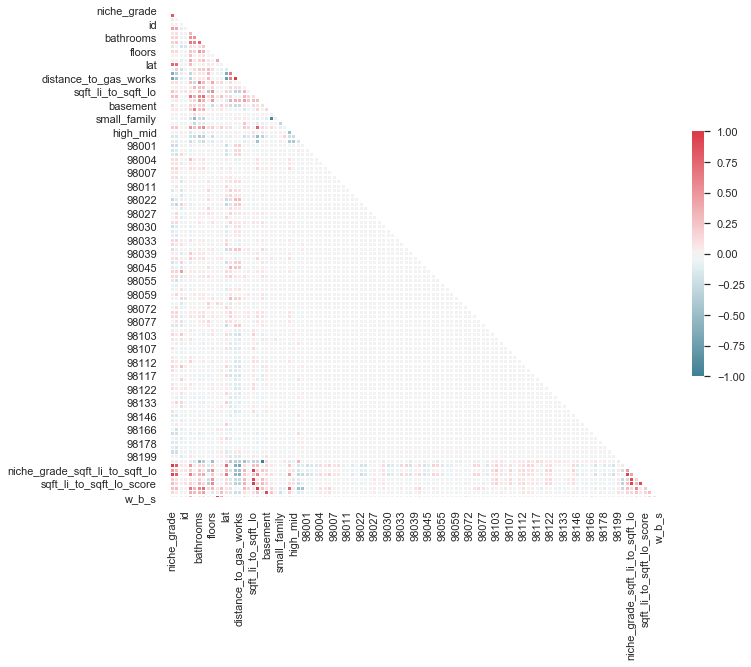

In [1316]:

corr = clean_data24.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [1317]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=30)

selector.fit(x_train, y_train)

SelectKBest(k=30, score_func=<function f_regression at 0x7fe346d338c8>)

In [1318]:
selector.get_support()

array([ True,  True,  True, False,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True, False, False, False,  True,
        True, False,  True, False,  True, False,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True])

In [1319]:
selected_columns = x_train.columns[selector.get_support()]
removed_columns = x_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [1320]:
list(removed_columns)

['population',
 'sqft_lot',
 'sqft_li_to_sqft_lo',
 'sqft_li_to_sqft_lo^2',
 'id',
 'long',
 'golden_ratio',
 'year_updated',
 'mansion',
 'starter',
 'high_mid',
 'years_since_updated',
 98001,
 98002,
 98003,
 98005,
 98006,
 98007,
 98008,
 98010,
 98011,
 98014,
 98019,
 98022,
 98023,
 98024,
 98027,
 98028,
 98029,
 98030,
 98031,
 98032,
 98033,
 98034,
 98038,
 98042,
 98045,
 98052,
 98053,
 98055,
 98056,
 98058,
 98059,
 98065,
 98070,
 98072,
 98074,
 98075,
 98077,
 98092,
 98102,
 98103,
 98105,
 98106,
 98107,
 98108,
 98109,
 98115,
 98116,
 98117,
 98118,
 98119,
 98122,
 98125,
 98126,
 98133,
 98136,
 98144,
 98146,
 98148,
 98155,
 98166,
 98168,
 98177,
 98178,
 98188,
 98198,
 98199]

In [1321]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(x_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(x_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(x_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 163286.25668695202
Testing Root Mean Squared Error: 156995.9590658881


In [1322]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')

Original:  148405.09965352516 
 KBest:    156995.9590658881 



In [1323]:
from sklearn.feature_selection import RFECV

In [1324]:
ols = linear_model.LinearRegression()

In [1325]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(x_train, y_train)

Fitting estimator with 108 features.


RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=-1, scoring='neg_mean_squared_error',
      step=2, verbose=1)

In [1326]:
selected_rfe = x_train.columns[selector.support_]
removed_rfe = x_train.columns[~selector.support_]

In [1327]:
removed_rfe

Index(['id', 'years_since_updated'], dtype='object')

In [1328]:
selected_rfe

Index([                 'view',           'niche_grade',
                'school_grade',            'population',
                 'sqft_living',              'sqft_lot',
             'distance_amazon', 'distance_to_gas_works',
                 'bath_to_bed',    'sqft_li_to_sqft_lo',
       ...
                         98155,                   98166,
                         98168,                   98177,
                         98178,                   98188,
                         98198,                   98199,
                       's_b_b',                 'w_b_s'],
      dtype='object', length=106)

In [1329]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(x_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(x_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(x_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)

Training Root Mean Squared Error: 153344.39147565013
Testing Root Mean Squared Error: 148357.80112938912


In [1330]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n',
      "RFE:     ", testRFE_rmse)

Original:  148405.09965352516 
 KBest:    156995.9590658881 
 RFE:      148357.80112938912


### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [1345]:
run_q_five(td, td_scale, sfeat, target)

Training Root Mean Squared Error: 153342.29028962445
Testing Root Mean Squared Error: 148405.09965352516
Perfomance : 3 %


In [1360]:
price_corr = clean_data24[clean_data24.columns[:]].corr()['price'][:] 
price_corr[not_in].sort_values()

id                     -0.015644
long                    0.019327
sqft_li_to_sqft_lo^2    0.051257
lat                     0.302394
niche_grade             0.457275
score                   0.659316
Name: price, dtype: float64

In [1359]:
not_in = [x for x in td_scale if x not in final_feats] 
not_in

['niche_grade', 'id', 'lat', 'long', 'score', 'sqft_li_to_sqft_lo^2']

In [1334]:
not_in2 = [x for x in sfeat if x not in nsfeat] 
not_in2

['view', 'niche_grade', 'score', 'sqft_li_to_sqft_lo^2']

In [1363]:
final_feats = ['view','years_since_updated','year_updated','niche_grade_score','population','sqft_lot','score^2','niche_grade_sqft_li_to_sqft_lo',
               'distance_to_gas_works','school_grade', 'golden_ratio', 'lat',
               'bedrooms', 'bathrooms','basement', 'sqft_living', 'floors',
       'waterfront', 'distance_amazon','bath_to_bed', 'sqft_li_to_sqft_lo',
         'large_family', 'mansion', 'small_family', 'starter', 'high_end', 
        'high_mid', 'low', 'low_mid', 'niche_grade^2', 'sqft_li_to_sqft_lo_score', 98001,
                         98002,                   98003,
                         98004,                   98005,
                         98006,                   98007,
                         98008,                   98010,
                         98011,                   98014,
                         98019,                   98022,
                         98023,                   98024,
                         98027,                   98028,
                         98029,                   98030,
                         98031,                   98032,
                         98033,                   98034,
                         98038,                   98039,
                         98040,                   98042,
                         98045,                   98052,
                         98053,                   98055,
                         98056,                   98058,
                         98059,                   98065,
                         98070,                   98072,
                         98074,                   98075,
                         98077,                   98092,
                         98102,                   98103,
                         98105,                   98106,
                         98107,                   98108,
                         98109,                   98112,
                         98115,                   98116,
                         98117,                   98118,
                         98119,                   98122,
                         98125,                   98126,
                         98133,                   98136,
                         98144,                   98146,
                         98148,                   98155,
                         98166,                   98168,
                         98177,                   98178,
                         98188,                   98198,
                         98199,]


nsfeat =  ['view','years_since_updated','niche_grade_score','population','sqft_lot',
           'score^2','niche_grade_sqft_li_to_sqft_lo','distance_to_gas_works','school_grade',
         'sqft_living', 'floors','waterfront', 'distance_amazon','bath_to_bed', 'sqft_li_to_sqft_lo',
          'niche_grade^2', 'sqft_li_to_sqft_lo_score', 'lat' ] 

In [1364]:
run_q_five(td, final_feats, nsfeat, target)

Training Root Mean Squared Error: 155921.74550511892
Testing Root Mean Squared Error: 6655368985399.365
Perfomance : 4268403235 %


## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/